<h1><center><font color="blue"> AML CHALLENGE 2018 : What is the future selling price of a home?</font></center></h1>

<h3><center><font color="blue">Team aml11</font></center></h3>
<h3><center><font color="blue">Members : Albane Bonnaud & Kim-Anh-Nhi Nguyen</font></center></h3>


<p align="justify">This notebook is to present our approach of house prices predictions.</p>


<p align="justify">We have explored and analyzed our data, then have cleaned it. Then, we have explored several regression models. Through optimization, we have chosen the best model found and optimized its parameters thanks to techniques such as Grid Search and Bayesian Optimization.</p>

Table of contents
====================


**1. [Descriptive statistics about the data](#statdata)**
    
   1.1. [Discovering our data set](#discoverdata)
  
* 1.1.1. [Importations and loading the data](#import)
* 1.1.2. [Information about the train and the test data frames](#info) 
* 1.1.3. [Renaming the columns](#renaming)
* 1.1.4. [Statistics about the datasets](#statistics)
* 1.1.5. [Numerical VS categorical features](#separate)

1.2. [Analysis of our target samples : the sale price](#targetanalysis)
 
1.3. [Analysis of numerical features](#num)
 
1.4. [Analysis of categorical features](#cat)
 
1.5. [Analysis of missing data](#missinganalysis)
 

<br>
**2. [Data cleaning and pre-processing](#preprocessing)**
    
  2.1. [Removing / Replacing missing data](#missingremove)
      
  2.2. [Convert categorical features into numerical features](#convertcat)
 
* 2.2.1. [First mapping](#firstmap)
* 2.2.2. [Checking for misspelled values](#misspelled)
* 2.2.3. [Second mapping: cleaning misspelled values](#map2)
 
2.3. [Analysis of categorical features that have been converted into numerical features](#catnum)

2.4. [Combining features](#combine)

2.5. [Removing Outliers](#outlier)
 
2.6. [Best correlated features among all](#bestcor)

2.7. [Drop irrelevant columns with respect to the target](#drop)


<br>
**3. [Predictive models](#predictive)**
    
  3.1. [Presentation of the models & pros and cons](#presentation)
    
  3.2. [Linear Regression](#crosslin)
 
3.3. [Ridge Regression](#crossridge)
 
3.4. [Lasso Regression](#crosslasso)

3.5. [Decision Tree Regression](#crosstree)

3.6. [Extra-Tree Regression](#crossxtree)

3.7. [Gradient Boosting Regression](#crossboost)


<br>
**4. [Optimization](#optim)**

    
  4.1. [Presentation of Grid Search and Bayesian Optimization](#optimmethods)
 
* 4.1.1.[Grid Search](#grid)
* 4.1.2.[Bayesian Optimization](#bayes)
 
4.2. [Grid Search to find the best model](#bestm)
   * 4.2.1. [Linear Regression](#lin)
   * 4.2.2. [Ridge Regression](#ridge)
   * 4.2.3. [Lasso Regression](#lasso)
   * 4.2.4. [Decision Tree Regression](#tree)
   * 4.2.5. [Extra-Tree Regression](#xtree)
   * 4.2.6. [Gradient Boosting Regression](#boost)

4.3. [Bayesian Optimization to find the best parameters for the chosen model](#bayesoptim)

4.4. [Optimization of the threshold](#thoptim)

4.5. [Creating the submission file](#submit)

---

<a id='statdata'></a>
# 1. Descriptive statistics about the data


<a id='discoverdata'></a>
## 1.1. Discovering our data set

<a id='import'></a>
### 1.1.1. Importations and loading the data
Let's then start by loading the libraries and methods we need:

**First comments by just reading the .csv files**:

We started to simply look at the "Data description" file and the .csv files to have an idea of how the data base looks like.
First, we need to choose which structure is going to be used to explore the data base: `SparkSQL` or `pandas` libraries.
Looking at the .csv files, we can see that the train set has 1,200 elements and the test set has 1,460 elements.
There is less than 10,000 data elements in total so, using `SparkSQL` might not be beneficial and be as quick (or even slower) than using pandas, so we choose to use `pandas`.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from time import time


Let's now load the train set and the test set.

In [3]:
# we load the train set
df = pd.read_csv('challenge_data/train.csv', sep=',') 
# we load the test set
df_test = pd.read_csv('challenge_data/test.csv', sep=',') 

<a id='info'></a>
### 1.1.2. Information about the train and the test data frames

We use the `.info()` and `.head()` function simply to get an overview of both our data sets

In [4]:
print("###  TRAIN SET INFORMATION  ###\n")
print(df.info(),"\n")
print("*"*50, "\n\n")
print("### TEST SET INFORMATION  ###\n")
print(df_test.info())

###  TRAIN SET INFORMATION  ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 81 columns):
Id               1200 non-null int64
MSSubClass       1200 non-null int64
MSZoning         1200 non-null object
LotFrontage      990 non-null float64
LotArea          1200 non-null int64
Street           1200 non-null object
Alley            75 non-null object
LotShape         1200 non-null object
LandContour      1200 non-null object
Utilities        1200 non-null object
LotConfig        1200 non-null object
LandSlope        1200 non-null object
Neighborhood     1200 non-null object
Condition1       1200 non-null object
Condition2       1200 non-null object
BldgType         1200 non-null object
HouseStyle       1200 non-null object
OverallQual      1200 non-null int64
OverallCond      1200 non-null int64
YearBuilt        1200 non-null int64
YearRemodAdd     1200 non-null int64
RoofStyle        1200 non-null object
RoofMatl         1200 non-null ob

In [5]:
# look at the header
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### COMMENTS
- By looking at those results, we can already see that there are `NaN` values that we'll have to deal with in the cleaning step.
- We can also notice many null values for some features: the `.info()` shows for example that only 3 objects have a non-null value for the feature `PoolQC`.
- We then understand that `NaN` values can mean different things. Either that there is no such feature for the concerned house (for example no pool), either that the value is missing.
- We can also notice different types of features: int, float, object (string),... We'll have to be careful to perform an appropriate cleaning.
- Moreover, some features can have an astonishing type: for example, the building class (`MSSubClass`) is given by an integer, even if it could be seen as a categorical feature and not a numerical one. Perhaps we'll have to change it.

<a id='renaming'></a>
### 1.1.3. Renaming the columns
Just to make the table neat to **read and understandable**, we rename our database columns in a way that it is easier to understand a column's elements just by reading its name.
For example, the name **`MSSubClass`** is not as understandable is the name **`building_class`** for a column that describes the type of dwelling involved in the sale.

In [6]:
#we rename columns for easier understanding
df=df.rename(columns= {"Id":"house_id",
                                       "MSSubClass":"building_class",
                                       "MSZoning":"zoning_classification",
                                        "LotFrontage":"lot_frontage", 
                                       "LotArea":"lot_area",
                                      "Street":"street",
                                       "Alley":"alley",
                                       "LotShape":"lot_shape",
                                       "LandContour":"flatness",
                                       "Utilities":"utilities", 
                                       "LotConfig":"lot_config",
                                      "LandSlope":"land_slope",
                                       "Neighborhood":"neighborhood",
                                       "Condition1":"condition1",
                                       "Condition2":"condition2",
                                       "BldgType":"dwelling_type", 
                                       "HouseStyle":"dwelling_style",
                                      "OverallQual":"overall_quality",
                                       "OverallCond":"overall_condition",
                                       "YearBuilt":"year_built",
                                       "YearRemodAdd":"remodel_date",
                                       "RoofStyle":"roof_type", 
                                       "RoofMatl":"roof_material",
                                      "Exterior1st":"exterior_covering1",
                                       "Exterior2nd":"exterior_covering2",
                                       "MasVnrType":"masonry_type",
                                       "MasVnrArea":"masonry_area",
                                       "ExterQual":"exterior_quality", 
                                       "ExterCond":"exterior_condition",
                                      "Foundation":"foundation",
                                       "BsmtQual":"basement_height",
                                       "BsmtCond":"basement_condition",
                                       "BsmtExposure":"basement_exposure",
                                       "BsmtFinType1":"basement_finished_quality", 
                                       "BsmtFinSF1":"basement_finished_area1",
                                      "BsmtFinType2":"basement_finished_quality2",
                                       "BsmtFinSF2":"basement_finished_area2",
                                       "BsmtUnfSF":"basement_unfinished_area",
                                       "TotalBsmtSF":"total_basement_area",
                                       "Heating":"heating_type",
                                       "HeatingQC":"heating_quality_condition", 
                                       "CentralAir":"central_AC",
                                      "Electrical":"electrical_system",
                                       "1stFlrSF":"first_floor_area",
                                       "2ndFlrSF":"second_floor_area",
                                       "LowQualFinSF":"low_quality_area",
                                       "GrLivArea":"ground_living_area", 
                                       "BsmtFullBath":"nb_basement_full_bath",
                                      "BsmtHalfBath":"nb_basement_halfbath",
                                       "FullBath":"nb_full_bath",
                                       "HalfBath":"nb_half_bath",
                                       "BedroomAbvGr":"bedrooms",
                                       "KitchenAbvGr":"kitchens", 
                                       "KitchenQual":"kitchen_quality",
                                      "TotRmsAbvGrd":"total_rooms",
                                       "Functional":"home_functionality",
                                       "Fireplaces":"nb_fireplaces",
                                       "FireplaceQu":"fireplaces_quality",
                                       "GarageType":"garage_location", 
                                       "GarageYrBlt":"garage_year",
                                      "GarageFinish":"garage_interior",
                                       "GarageCars":"garage_capacity",
                                       "GarageArea":"garage_area", 
                                       "GarageQual":"garage_quality",
                                       "GarageCond":"garage_condition", 
                                       "PavedDrive":"paved_driveway",
                                       "WoodDeckSF":"wood_deck_area", 
                                       "OpenPorchSF":"open_porch_area",
                                      "EnclosedPorch":"enclosed_porch_area", 
                                       "3SsnPorch":"3_season_porch_area",
                                       "ScreenPorch":"screen_porch_area", 
                                       "PoolArea":"pool_area",
                                      "PoolQC":"pool_quality", 
                                       "Fence":"fence_quality",
                                       "MiscFeature":"miscellaneous_feature", 
                                       "MiscVal":"miscellaneous_value",
                                      "MoSold":"month_sold", 
                                       "YrSold":"year_sold",
                                       "SaleType":"sale_type", 
                                       "SaleCondition":"sale_condition",
                                       "SalePrice":"sale_price"} )

In [7]:
#we rename columns for easier understanding
df_test=df_test.rename(columns= {"Id":"house_id",
                                       "MSSubClass":"building_class",
                                       "MSZoning":"zoning_classification",
                                        "LotFrontage":"lot_frontage", 
                                       "LotArea":"lot_area",
                                      "Street":"street",
                                       "Alley":"alley",
                                       "LotShape":"lot_shape",
                                       "LandContour":"flatness",
                                       "Utilities":"utilities", 
                                       "LotConfig":"lot_config",
                                      "LandSlope":"land_slope",
                                       "Neighborhood":"neighborhood",
                                       "Condition1":"condition1",
                                       "Condition2":"condition2",
                                       "BldgType":"dwelling_type", 
                                       "HouseStyle":"dwelling_style",
                                      "OverallQual":"overall_quality",
                                       "OverallCond":"overall_condition",
                                       "YearBuilt":"year_built",
                                       "YearRemodAdd":"remodel_date",
                                       "RoofStyle":"roof_type", 
                                       "RoofMatl":"roof_material",
                                      "Exterior1st":"exterior_covering1",
                                       "Exterior2nd":"exterior_covering2",
                                       "MasVnrType":"masonry_type",
                                       "MasVnrArea":"masonry_area",
                                       "ExterQual":"exterior_quality", 
                                       "ExterCond":"exterior_condition",
                                      "Foundation":"foundation",
                                       "BsmtQual":"basement_height",
                                       "BsmtCond":"basement_condition",
                                       "BsmtExposure":"basement_exposure",
                                       "BsmtFinType1":"basement_finished_quality", 
                                       "BsmtFinSF1":"basement_finished_area1",
                                      "BsmtFinType2":"basement_finished_quality2",
                                       "BsmtFinSF2":"basement_finished_area2",
                                       "BsmtUnfSF":"basement_unfinished_area",
                                       "TotalBsmtSF":"total_basement_area",
                                       "Heating":"heating_type",
                                       "HeatingQC":"heating_quality_condition", 
                                       "CentralAir":"central_AC",
                                      "Electrical":"electrical_system",
                                       "1stFlrSF":"first_floor_area",
                                       "2ndFlrSF":"second_floor_area",
                                       "LowQualFinSF":"low_quality_area",
                                       "GrLivArea":"ground_living_area", 
                                       "BsmtFullBath":"nb_basement_full_bath",
                                      "BsmtHalfBath":"nb_basement_halfbath",
                                       "FullBath":"nb_full_bath",
                                       "HalfBath":"nb_half_bath",
                                       "BedroomAbvGr":"bedrooms",
                                       "KitchenAbvGr":"kitchens", 
                                       "KitchenQual":"kitchen_quality",
                                      "TotRmsAbvGrd":"total_rooms",
                                       "Functional":"home_functionality",
                                       "Fireplaces":"nb_fireplaces",
                                       "FireplaceQu":"fireplaces_quality",
                                       "GarageType":"garage_location", 
                                       "GarageYrBlt":"garage_year",
                                      "GarageFinish":"garage_interior",
                                       "GarageCars":"garage_capacity",
                                       "GarageArea":"garage_area", 
                                       "GarageQual":"garage_quality",
                                       "GarageCond":"garage_condition", 
                                       "PavedDrive":"paved_driveway",
                                       "WoodDeckSF":"wood_deck_area", 
                                       "OpenPorchSF":"open_porch_area",
                                      "EnclosedPorch":"enclosed_porch_area", 
                                       "3SsnPorch":"3_season_porch_area",
                                       "ScreenPorch":"screen_porch_area", 
                                       "PoolArea":"pool_area",
                                      "PoolQC":"pool_quality", 
                                       "Fence":"fence_quality",
                                       "MiscFeature":"miscellaneous_feature", 
                                       "MiscVal":"miscellaneous_value",
                                      "MoSold":"month_sold", 
                                       "YrSold":"year_sold",
                                       "SaleType":"sale_type", 
                                       "SaleCondition":"sale_condition",
                                       "SalePrice":"sale_price"} )

<a id='statistics'></a>
### 1.1.4. Statistics about the datasets

In [8]:
# statistical figures about the train set
df.describe()

,house_id,building_class,lot_frontage,lot_area,overall_quality,overall_condition,year_built,remodel_date,masonry_area,basement_finished_area1,...,wood_deck_area,open_porch_area,enclosed_porch_area,3_season_porch_area,screen_porch_area,pool_area,miscellaneous_value,month_sold,year_sold,sale_price
count,1200.000000,1200.000000,990.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1194.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,600.500000,57.075000,70.086869,10559.411667,6.105000,5.568333,1971.350833,1984.987500,103.962312,444.886667,...,95.136667,46.016667,22.178333,3.653333,14.980833,1.909167,40.453333,6.311667,2007.810833,181414.628333
std,346.554469,42.682012,23.702029,10619.135549,1.383439,1.120138,30.048408,20.527221,183.534953,439.987844,...,124.034129,65.677629,61.507323,29.991099,54.768057,33.148327,482.323444,2.673104,1.319027,81070.908544
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,300.750000,20.000000,59.000000,7560.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,600.500000,50.000000,70.000000,9434.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163700.000000
75%,900.250000,70.000000,80.000000,11616.000000,7.000000,6.000000,2000.000000,2004.000000,166.750000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1200.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# statistical figures about the test set
df_test.describe()

,house_id,building_class,lot_frontage,lot_area,overall_quality,overall_condition,year_built,remodel_date,masonry_area,basement_finished_area1,...,garage_area,wood_deck_area,open_porch_area,enclosed_porch_area,3_season_porch_area,screen_porch_area,pool_area,miscellaneous_value,month_sold,year_sold
count,260.000000,260.000000,211.000000,260.000000,260.000000,260.000000,260.000000,260.000000,258.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,1330.500000,56.076923,69.876777,10320.288462,6.073077,5.607692,1970.884615,1984.303846,102.403101,437.884615,...,474.715385,90.126923,49.630769,20.919231,2.284615,15.430769,6.680769,57.500000,6.369231,2007.838462
std,75.199734,40.563048,26.911212,6255.537115,1.383314,1.079798,30.962085,21.213658,169.505783,524.993497,...,219.140520,131.361754,68.915161,59.399547,26.005564,60.224091,63.147817,556.196665,2.845137,1.371547
min,1201.000000,20.000000,21.000000,1533.000000,3.000000,3.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1265.750000,20.000000,59.500000,7500.000000,5.000000,5.000000,1950.000000,1966.000000,0.000000,0.000000,...,332.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.750000,2007.000000
50%,1330.500000,50.000000,67.000000,9600.000000,6.000000,5.000000,1971.500000,1992.000000,0.000000,360.000000,...,484.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1395.250000,70.000000,80.000000,11515.500000,7.000000,6.000000,2001.250000,2004.000000,160.000000,704.750000,...,573.000000,168.000000,70.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,63887.000000,10.000000,9.000000,2009.000000,2009.000000,796.000000,5644.000000,...,1418.000000,736.000000,547.000000,301.000000,304.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000


### COMMENTS
* We notice that the features have quite the same statistical properties, from one set to another (except the 'count' value, since there are much more values in the train set).
* In particular the mean, max and min for each feature are almost the same in the train and in the test sets.
* This means that the data of the train and the test are quite similar, which is good for us: tuning the model on the train data will give accurate predictions on the test set !

<a id='separate'></a>
### 1.1.5. Numerical VS Categorical features
#### We noticed there are 2 types of features : numerical and categorical
Let's divide our data set in those 2 types of features just for a better analysis of our data.

In [10]:
col_names=list(df)
col_num = [] #list of columns names with numerical features
col_cat = [] #list of columns names with categorical features

for name in col_names:
    if df[name].dtype == 'O': #Object type
        col_cat.append(name)
    else:
        col_num.append(name)

dfnum = df[col_num]
dfcat = df[col_cat]

print("Number of Numerical features: ", len(col_num))
print("\n", col_num)
print("\nNumber of Categorical features: ", len(col_cat))
print("\n", col_cat)

Number of Numerical features:  38

 ['house_id', 'building_class', 'lot_frontage', 'lot_area', 'overall_quality', 'overall_condition', 'year_built', 'remodel_date', 'masonry_area', 'basement_finished_area1', 'basement_finished_area2', 'basement_unfinished_area', 'total_basement_area', 'first_floor_area', 'second_floor_area', 'low_quality_area', 'ground_living_area', 'nb_basement_full_bath', 'nb_basement_halfbath', 'nb_full_bath', 'nb_half_bath', 'bedrooms', 'kitchens', 'total_rooms', 'nb_fireplaces', 'garage_year', 'garage_capacity', 'garage_area', 'wood_deck_area', 'open_porch_area', 'enclosed_porch_area', '3_season_porch_area', 'screen_porch_area', 'pool_area', 'miscellaneous_value', 'month_sold', 'year_sold', 'sale_price']

Number of Categorical features:  43

 ['zoning_classification', 'street', 'alley', 'lot_shape', 'flatness', 'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition1', 'condition2', 'dwelling_type', 'dwelling_style', 'roof_type', 'roof_material', 'exte

<a id='targetanalysis'></a>
## 1.2. Analysis of our target samples : the sale price

Before going further on all the features, we must know what our target feature (the one that we want to predict) looks like.

In [11]:
# first, some statistics about the sale prices
df['sale_price'].describe()

count      1200.000000
mean     181414.628333
std       81070.908544
min       34900.000000
25%      129900.000000
50%      163700.000000
75%      214000.000000
max      755000.000000
Name: sale_price, dtype: float64

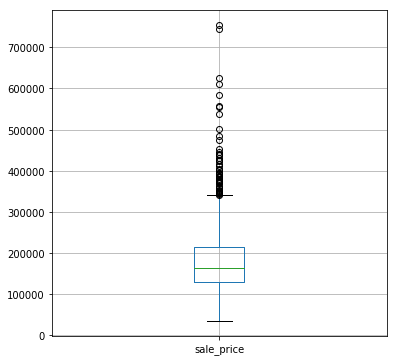

In [12]:
df.boxplot(column=["sale_price"],figsize = (6,6))

### COMMENTS
* At first look the data seems to be well balanced, and varied enough. Indeed we've got a mean equal to 181,414 dollars and a closed median of 163,700 dollars. Moreover the first and third quartiles are equally scattered around the median. This means that we have a sufficiently large panel of houses and prices.
* We can also notice outliers above 340,000 dollars. We'll have to deal with it thereafter.

<br><br>
Let's now examine the distribution of the sale prices.


 mu = 181414.63 and sigma = 81037.12



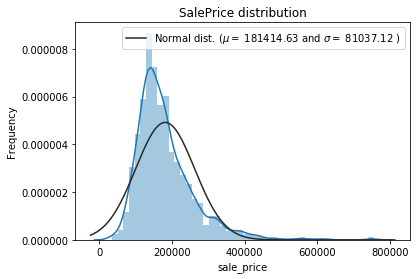

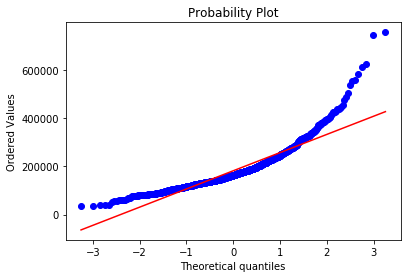

In [13]:
# plot a histogram of sale prices
sns.distplot(df['sale_price'] , fit=stats.norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['sale_price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)])
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['sale_price'], plot=plt)
plt.show()

In [14]:
#skewness and kurtosis
print("Skewness: %f" % df['sale_price'].skew())
print("Kurtosis: %f" % df['sale_price'].kurt())

Skewness: 1.967215
Kurtosis: 7.033907


### COMMENTS
* We can see that the target variable `sale_price` is not normally distributed.
Actually it is **right skewed**. This means that the peak of the histogram swings to the left, and that the histogram’s tail has a positive skew to the right.

* A non-normally distribution can reduce performance of many models because **they assume normal distribution**.
We thus need to transform our variable and make it more normally distributed.

C:\Users\kanng\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  



 mu = 12.02 and sigma = 0.40



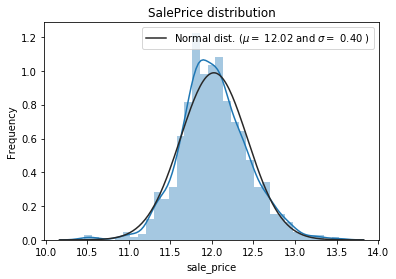

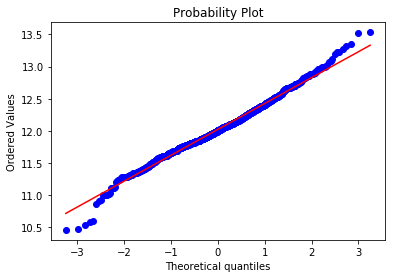

In [15]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
log_sales_price = np.log1p(df['sale_price'])

# we define a new column in the data frame for the log of the sale price :
#df['log_sale_price'] = np.log1p(df['sale_price'])
dfnum['log_sale_price'] = np.log1p(dfnum['sale_price'])

#Check the new distribution 
sns.distplot(log_sales_price , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(log_sales_price)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(log_sales_price, plot=plt)
plt.show()

#### The skew seems now corrected and the data appears more normally distributed.
Therefore, from now on, we will work on `log_sale_price`, the logarithm of the sale prices to make our predictions. Then, we'll use the exponential value to get the price.

<a id='num'></a>
## 1.3. Analysis of numerical features

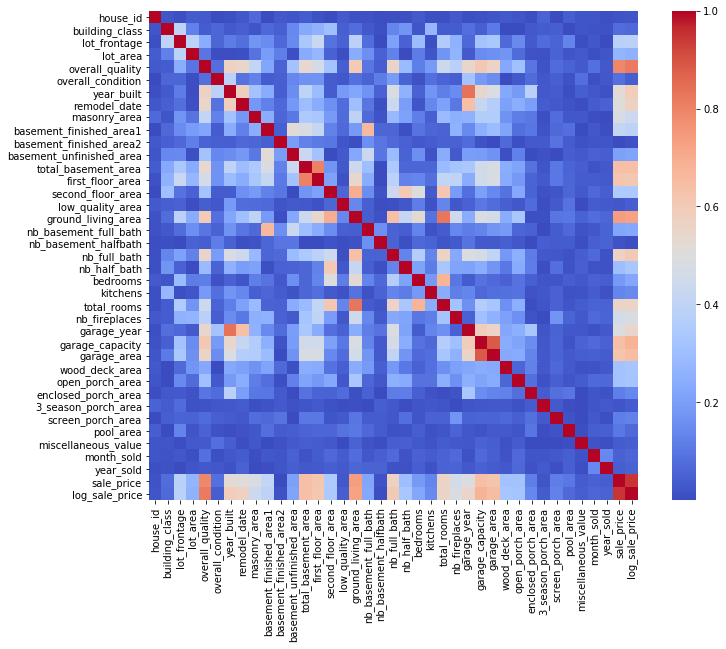

In [16]:
# we visualize the correlation matrix of numerical features
corr_matrix = dfnum.corr()
corr_matrix = corr_matrix.abs()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix,cmap='coolwarm', vmax=1, square=True)

### COMMENTS

* There are a lot of features, so the correlation matrix is quite big.
* A lot of correlation values are low (in blue).
* We only are interested in features that are highly correlated with the `log_sale_price`. 


So, let's visualize the correlation matrix with respect to the log sale price, on a selection of highly correlated features:

In [17]:
def corr_matrix_best_features(df, corr_matrix, criteria = 'log_sale_price', nb_features=10, size = 10):
    # Take the best Correlation values
    # nb_features = number of the best features, the ones that correlates the best with the criteria
    best_features = corr_matrix.nlargest(nb_features, criteria)[criteria]
    cols = best_features.index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, annot=True,cmap='coolwarm', annot_kws={'size': size}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()
    
    # we keep the data frame with only the selected features
    df_select = df[cols]
    
    return(df_select)

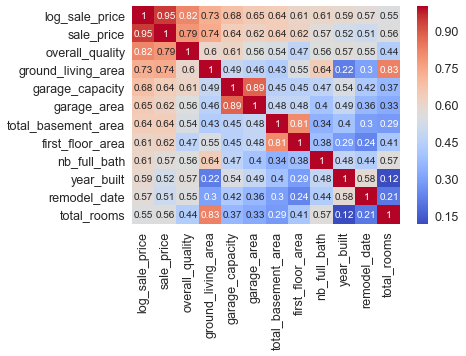

Best Features are :
 ['log_sale_price', 'sale_price', 'overall_quality', 'ground_living_area', 'garage_capacity', 'garage_area', 'total_basement_area', 'first_floor_area', 'nb_full_bath', 'year_built', 'remodel_date', 'total_rooms'] 




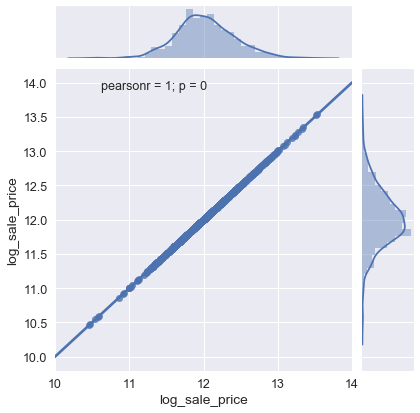

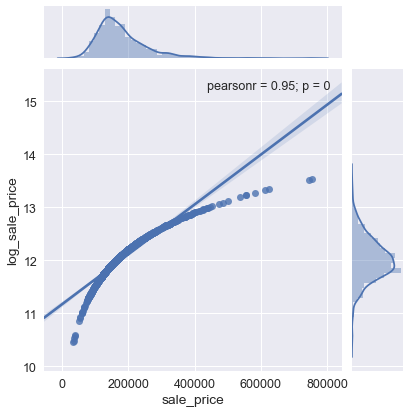

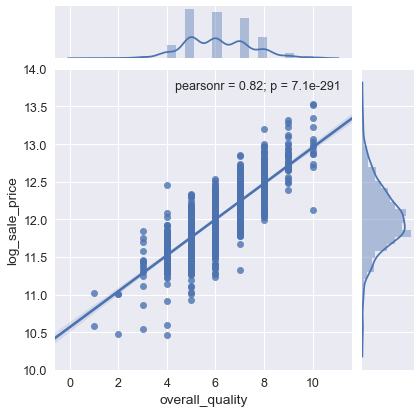

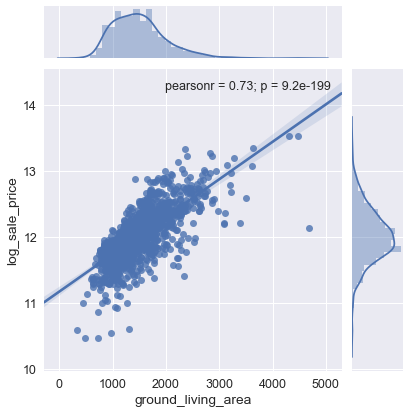

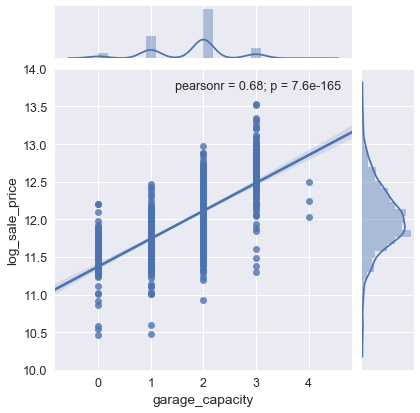

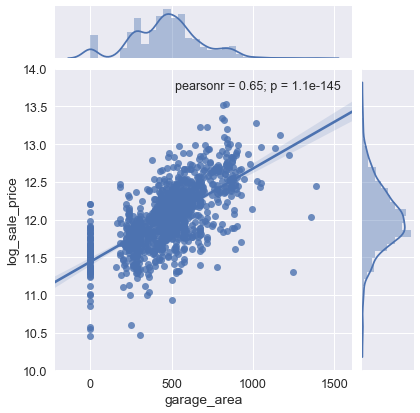

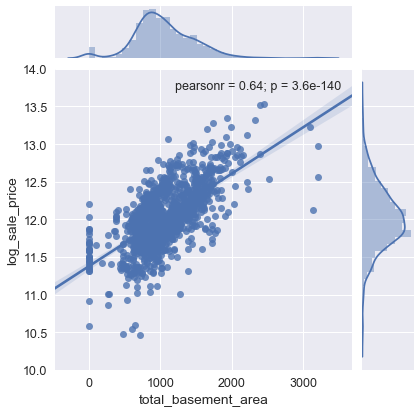

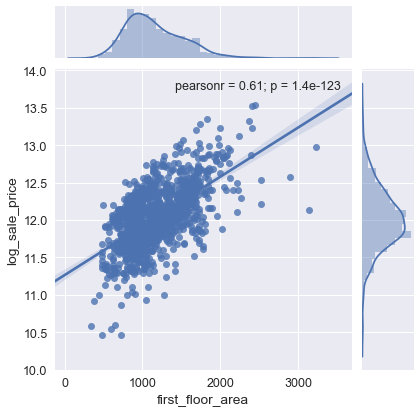

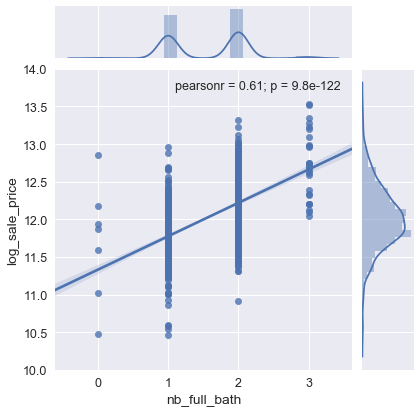

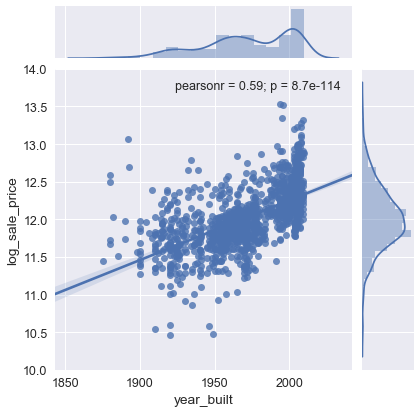

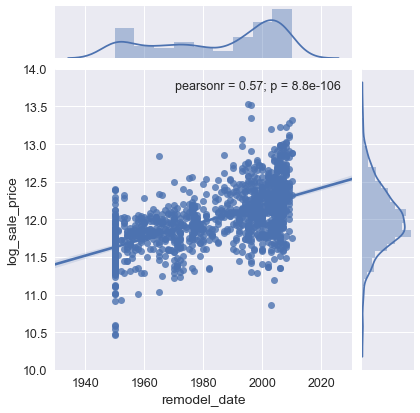

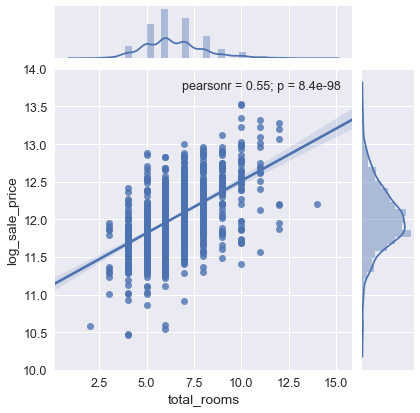

In [18]:
df_select_not_clean = corr_matrix_best_features(dfnum, corr_matrix, criteria = 'log_sale_price', nb_features=12)

print("Best Features are :\n", list(df_select_not_clean), "\n\n")

for col in list(df_select_not_clean) :
    sns.jointplot(col, 'log_sale_price', data = dfnum, kind='reg')
    plt.show()



#### COMMENTS ON THE LINEARITY

All these features seem to be more or less **linear** dependent with the log sale price. Here are additional comments about some features: 
* `garage_capacity`: it seems linear without considering the outliers; indeed there are very few houses where 4 cars that can fit in the garage apparently
* `garage_area` :  we can see that a lot of garage areas are equal to $0$ ! It simply means there is no garage in the house
* `total_basement_area`: we can see that a lot of basement areas are equal to $0$ ! It simply means there is no basement in the house

These observations of linearities makes us think of using regression models later on (see part **3.**) when doing our predictions on the prices.

#### COMMENTS ON THE INTER-CORRELATION
* `garage_capacity` and `garage_area`: these features are also some of the most strongly correlated variables. However, the number of cars that fit into the garage is a consequence of the garage area. `garage_capacity` and `garage_area` are like "twin brothers". Therefore, we just need one of these variables in our analysis (we can keep `garage_capacity` since its correlation with `log_sale_price` is higher).
* `ground_living_area` and `total_rooms`: these features are also "twin brothers". We can keep `ground_living_area` only since its correlation with `log_sale_price` is higher
* `total_basement_area` and `first_floor_area`: these features are also "twin brothers". We can keep `total_basement_area` only since its correlation with `log_sale_price` is higher

These columns that we can get rid of will be dropped later on in the paragraph **2.7.** in the pre-processing part.

#### OUTLIERS 
 Let's look at the outliers for the first 3 most correlated features, which are:
 
- `overall_quality` : there are very few points at an overall quality of 1 or 2 (only 4 points). They are too few to bring relevant information.
- `ground_living_area` : there is one striking outlier at around 4,600 square feet with a very low price compared to other areas
- `garage_capacity`: there are only 3 points where the garage capacity is 4. They are too few to bring relevant information.

<a id='cat'></a>
## 1.4. Analysis of categorical features

#### Here is a list of categorical features and their unique values :

In [19]:
for cat in list(dfcat) :
    print(dfcat[cat].value_counts())
    print('#'*50)

RL         946
RM         178
FV          55
RH          12
C (all)      9
Name: zoning_classification, dtype: int64
##################################################
Pave    1194
Grvl       6
Name: street, dtype: int64
##################################################
Grvl    41
Pave    34
Name: alley, dtype: int64
##################################################
Reg    754
IR1    403
IR2     37
IR3      6
Name: lot_shape, dtype: int64
##################################################
Lvl    1079
Bnk      49
HLS      42
Low      30
Name: flatness, dtype: int64
##################################################
AllPub    1199
NoSeWa       1
Name: utilities, dtype: int64
##################################################
Inside     862
Corner     223
CulDSac     75
FR2         38
FR3          2
Name: lot_config, dtype: int64
##################################################
Gtl    1135
Mod      54
Sev      11
Name: land_slope, dtype: int64
#########################################

#### COMMENTS  ON OUTLIERS:
* Some features have values (categories) that almost never appear : 1 or 2 times only. Example: value `Sev` of the `home_functionality` feature.
* Thus, we can consider those "isolated" points as outliers, since the information they bring is not relevant enough.
* In the cleaning part (part 2), we'll then remove the following outliers:
    - `utilities` : `NoSeWa` (1 point)
    - `lot_config` : `FR3` (2 points)
    - `neighborhood` : `Blueste` (2 points)
    - `condition1` : `RRNe` (2 points)
    - `condition2` : `PosN` (2 points),  `Artery` (2 points), `RRNn` (2 points), `PosA` (1 point), `RRAn`
    - `roof_material` : `Metal` (1 point), `Membran` (1 point)
    - `exterior_covering1` : `Stone` (2 points), `BrkComm` (2 points), `ImStucc` (1 point), `AsphShn` (1 point)
    - `exterior_covering2` : `Other` (1 point)
    - `exterior_condition` : `Po` (1 point)
    - `foundation` : `Wood` (2 points)
    - `basement_condition` : `Po` (2 points)
    - `heating_quality_condition` : `Po` (1 point)
    - `electrical_system` : `Mix` (1 point)
    - `home_functionality` : `Sev` (1 point)
    - `garage_condition` : `Ex` (2 points)
    - `miscellaneous_feature` : `Othr` (2 points), `Gar2` (1 point)
    - `sale_type` : `Con` (2 points), `Oth` (2 points)
 
 Note: For the `pool_quality`, we won't remove isolated points since...there are only isolated points ! (there are few houses with a pool, and thus few data points with this feature).

<a id='missinganalysis'></a>
## 1.5. Analysis of missing data

Let's analyse first the proportion of missing data 

Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

In [20]:
# we keep the target y in a separate list
y_train = df.sale_price.values
y_train_unskewed = np.log1p(y_train) 

test_id = df_test['house_id'] # we keep the id for the test data for the submission file at the end of the notebook

# The cleaning has to be done on both train and test sets : we combine both data sets
all_data = pd.concat((df, df_test)).reset_index(drop=True)
all_data.drop(['sale_price'], axis=1, inplace=True)

print("all_data size is : {}".format(all_data.shape))

all_data size is : (1460, 80)


In [21]:
# we also keep the target in a seperate dataframe
y_train_df = df.iloc[:, 80:]
y_train_unskewed_df = np.log1p(y_train_df)
y_train_unskewed_df=y_train_unskewed_df.rename(columns={'sale_price':'log_sale_price'})

In [22]:
# missing data : to see what need to be cleaned, we look at ratios of missing data
def missing_data(all_data):
    all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:40]
    missing_data_df = pd.DataFrame({'Ratio of Missing Values' :all_data_na})
    return(missing_data_df, all_data_na)

missing = missing_data(all_data)[0]
all_data_na = missing_data(all_data)[1]
missing.head(20)

,Ratio of Missing Values
pool_quality,99.520548
miscellaneous_feature,96.301370
alley,93.767123
fence_quality,80.753425
fireplaces_quality,47.260274
lot_frontage,17.739726
garage_year,5.547945
garage_quality,5.547945
garage_location,5.547945
garage_interior,5.547945


Text(0.5,1,'Percent missing data by feature')

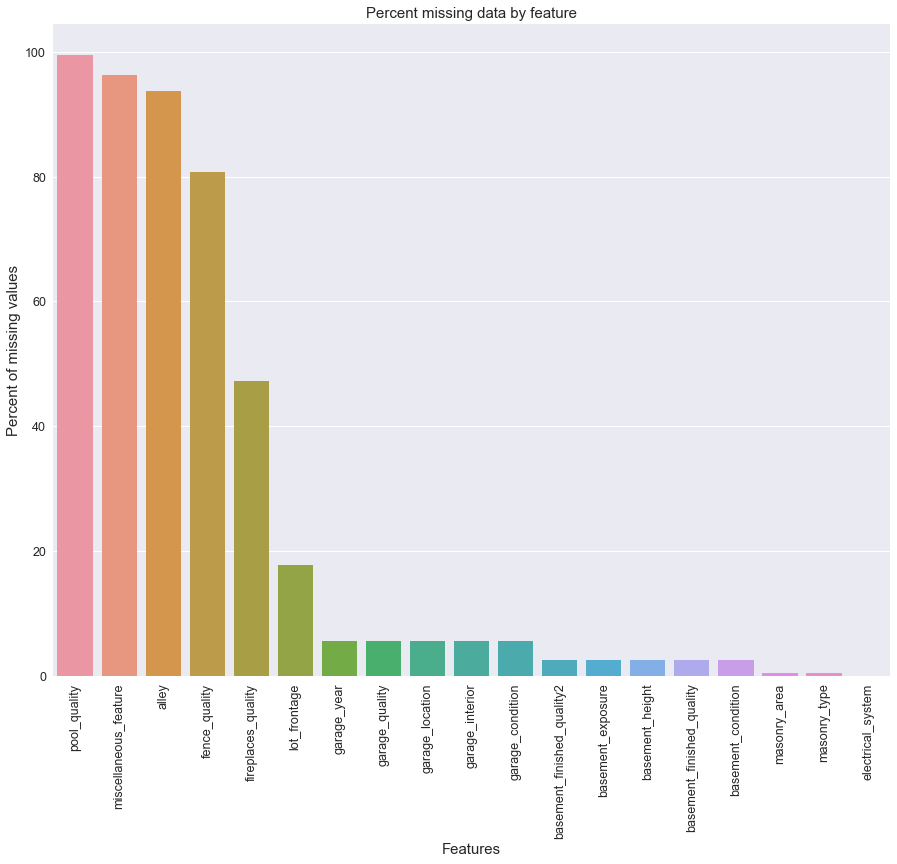

In [23]:
# let's visualize the percentages of missing data per columns
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### COMMENTS
There are 19 features with missing data in total.

There are 2 types of features with missing data : 

* features with a majority of missing data (from 47% to almost 100% ratio of missing data !).
* features with a minority of missing data (one with 17% and the others with less than 6%)

However, there are a limited a number of possible values for each of these features, so we will try to replace the missing values by hand.

 ---
 
 
 

<a id='preprocessing'></a>
# 2. Data cleaning and pre-processing


<a id='missingremove'></a>
## 2.1. Removing / Replacing missing data

Let's replace missing values with the most relevant value, depending on each feature.

We impute the missing values by proceeding sequentially through features with missing values.

##### 1. Checking what missing values mean for features with `NA` values :

* **`pool_quality`** : the data description file says `NA` means `No Pool`. That makes sense, given the huge ratio of missing value (>99%) and majority of houses have no pool at all in general.
* **`miscellaneous_feature`** : there also is a hugh ratio of more than 96% missing data. The data description says `NA` means there is None miscellaneous feature.
* **`alley`** : The data description says `NA` means there is "No alley access", which is the case for more than 93%.
* **`fence_quality`** : The data description says `NA` means there is "No fence"
* **`fireplaces_quality`** : data description says `NA` means there is "No fireplace"

* **`garage_location`**, **`garage_interior`**, **`garage_quality`**, **`garage_condition`** : The data description says `NA` means there is "No garage".

* **`basement_height`**, **`basement_exposure`**, **`basement_finished_quality`**, **`basement_finished_quality2`**, **`basement_condition`** : For all these categorical basement-related features, `NaN` means that there is no basement. The data description says `NA` means there is "No basement"

So, for the features above, we replace all the missing data with `NA` (a string).

##### 2. Checking what missing values mean for features with other values :

* **`lot_frontage`** : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median `lot_frontage` of the neighborhood.

* **`garage_year`** : we decide to replace missing data with 0

* **`masonry_area`**, **`masonry_type`** : missing data most likely means there is no masonry veneer for these houses. We can fill 0 for the area and `NA` for the type.

* **`electrical_system`**: The data description file doesn't indicate any possible "NA" or "Undefined" value. We could replace the missing value with the most frequent value, but it would be unbiased. Therefore, we add a new value called `Undefined`

In [24]:
def remove_missing_data(all_data):
    ### 1.
    all_data["pool_quality"] = all_data["pool_quality"].fillna("NA")
    all_data["miscellaneous_feature"] = all_data["miscellaneous_feature"].fillna("NA")
    all_data["alley"] = all_data["alley"].fillna("NA")
    all_data["fence_quality"] = all_data["fence_quality"].fillna("NA")
    all_data["fireplaces_quality"] = all_data["fireplaces_quality"].fillna("NA")

    for col in ('garage_location','garage_interior', 'garage_quality', 'garage_condition'):
        all_data[col] = all_data[col].fillna('NA')

    for col in ('basement_height', 'basement_condition', 'basement_exposure', 'basement_finished_quality', 'basement_finished_quality2'):
        all_data[col] = all_data[col].fillna('NA')
    
    ### 2.
    all_data["lot_frontage"] = all_data.groupby("neighborhood")["lot_frontage"].transform(
        lambda x: x.fillna(x.median()))

    all_data['garage_year'] = all_data['garage_year'].fillna(0)

    all_data["masonry_type"] = all_data["masonry_type"].fillna("None")
    all_data["masonry_area"] = all_data["masonry_area"].fillna(0)
    all_data["electrical_system"] = all_data["electrical_system"].fillna("Undefined")
    
    return(all_data)

In [25]:
all_data = remove_missing_data(all_data)

In [26]:
#Check remaining missing values if any 
missing = missing_data(all_data)[0]
missing.head(20)

,Ratio of Missing Values


Therefore, all the missing data have been replaced !

<a id='convertcat'></a>
## 2.2. Convert categorical features into numerical features

As we rely on correlation to select the best features for our regression models, **we need numerical values** for every feature, so that the correlation between one feature and the log sale price can be computed.

Therefore, we chose to map every category in each categorical feature with an integer.

<a id='firstmap'></a>
### 2.2.1. First mapping
We map each possible chain of caracters for a categorical feature (the key) with a numerical value (the value). We arbitrarily choose to map them in the alphabetical order. 

In [27]:
def map_values():
    all_data["building_class"] = all_data["building_class"].map({20:1, 30:2, 40:3, 45:4, 50:5, 60:6, 70:7, 75:8, 80:9, 
                                        85:10, 90:11, 120:12, 150:13, 160:14, 180: 15, 190:16})
    
    all_data["zoning_classification"] = all_data["zoning_classification"].map({'A':1, 'C':2, 'FV':3, 'I':4, 'RH':5, 'RL':6, 
                                        'RP':7, 'RM':8})
    all_data["street"] = all_data["street"].map({'Grvl':1, 'Pave':2})
    
    all_data["alley"] = all_data["alley"].map({'Grvl':1, 'Pave':2, 'NA':3})
    
    all_data["lot_shape"] = all_data["lot_shape"].map({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4 })
    
    all_data["flatness"] = all_data["flatness"].map({'Lvl':1, 'Bnk':2, 'HLS':3, 'Low':4 })
    
    all_data["utilities"] = all_data["utilities"].map({'AllPub':1, 'NoSewr':2, 'NoSeWa':3, 'ELO':4})
    
    all_data["lot_config"] = all_data["lot_config"].map({'Inside':1,'Corner':2, 'CulDSac':3, 'FR2':4, 'FR3':5})
    
    all_data["land_slope"] = all_data["land_slope"].map({'Gtl':1, 'Mod':2, 'Sev':3})
    
    all_data["neighborhood"] = all_data["neighborhood"].map({'Blmngtn':1, 'Blueste':2, 'BrDale':3, 'BrkSide':4, 'ClearCr':5, 
                                        'CollgCr':6, 'Crawfor':7, 'Edwards':8, 'Gilbert':9, 
                                        'IDOTRR':10, 'MeadowV':11, 'Mitchel':12, 'Names':13, 'NoRidge':14,
                                        'NPkVill': 15, 'NridgHt':16, 'NWAmes':17, 'OldTown':18, 
                                        'SWISU':19, 'Sawyer':20, 'SawyerW':21, 'Somerst':22, 'StoneBr':23,
                                        'Timber':24, 'Veenker':25})
    
    all_data["condition1"] = all_data["condition1"].map({'Artery':1, 'Feedr':2, 'Norm':3, 'RRNn':4, 'RRAn':5,
                                        'PosN':6, 'PosA':7, 'RRNe':8, 'RRAe':9})
    
    all_data["condition2"] = all_data["condition2"].map({'Artery':1, 'Feedr':2, 'Norm':3, 'RRNn':4, 'RRAn':5,
                                        'PosN':6, 'PosA':7, 'RRNe':8, 'RRAe':9})
    
    all_data["dwelling_type"] = all_data["dwelling_type"].map({'1Fam':1, '2FmCon':2, 'Duplx':3, 'TwnhsE':4, 'TwnhsI':5})
    
    all_data["dwelling_style"] = all_data["dwelling_style"].map({'1Story':1, '1.5Fin':2, '1.5Unf':3, '2Story':4, '2.5Fin':5,
                                        '2.5Unf':6, 'SFoyer':7, 'SLvl':8})
    
    all_data["roof_type"] = all_data["roof_type"].map({'Flat':1, 'Gable':2, 'Gambrel':3, 'Hip':4, 'Mansard':5,'Shed':6})
    
    all_data["roof_material"] = all_data["roof_material"].map({'ClyTile':1, 'CompShg':2, 'Membran':3, 'Metal':4, 'Roll':5,
                                        'Tar&Grv':6, 'WdShake':7, 'WdShngl':8})

    all_data["exterior_covering1"] = all_data["exterior_covering1"].map({'AsbShng':1, 'AsphShn':2, 'BrkComm':3, 'BrkFace':4, 
                                        'CBlock':5,'CemntBd':6, 'HdBoard':7, 'ImStucc':8, 'MetalSd':9, 'Other':10, 'Plywood':11,
                                        'PreCast':12, 'Stone':13, 'Stucco':14,'VinylSd': 15, 'Wd Sdng':16, 'WdShing':17})
    
    all_data["exterior_covering2"] = all_data["exterior_covering2"].map({'AsbShng':1, 'AsphShn':2, 'BrkComm':3, 'BrkFace':4, 
                                        'CBlock':5,'CemntBd':6, 'HdBoard':7, 'ImStucc':8, 'MetalSd':9, 'Other':10, 'Plywood':11,
                                        'PreCast':12, 'Stone':13, 'Stucco':14,'VinylSd': 15, 'Wd Sdng':16, 'WdShing':17})
    
    all_data["masonry_type"] = all_data["masonry_type"].map({'BrkCmn':1, 'BrkFace':2, 'CBlock':3, 'None':4, 'Stone':5})
    
    all_data["exterior_quality"] = all_data["exterior_quality"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
    
    all_data["exterior_condition"] = all_data["exterior_condition"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
    
    all_data["foundation"] = all_data["foundation"].map({'BrkTil':1, 'CBlock':2, 'PConc':3, 'Slab':4, 'Stone':5, 'Wood':6})
    
    all_data["basement_height"] = all_data["basement_height"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
    
    all_data["basement_condition"] = all_data["basement_condition"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
    
    all_data["basement_exposure"] = all_data["basement_exposure"].map({'Gd':1, 'Av':2, 'Mn':3, 'No':4,'NA':5})
    
    all_data["basement_finished_quality"] = all_data["basement_finished_quality"].map({'GLQ':1, 'ALQ':2, 'BLQ':3, 
                                        'Rec':4,'LwQ':5, 'Unf':6,'NA':7 })

    all_data["basement_finished_quality2"] = all_data["basement_finished_quality2"].map({'GLQ':1, 'ALQ':2, 'BLQ':3, 
                                        'Rec':4,'LwQ':5, 'Unf':6,'NA':7 })
    
    all_data["heating_type"] = all_data["heating_type"].map({'Floor':1, 'GasA':2, 'GasW':3, 'Grav':4, 'OthW':5, 'Wall':6})

    all_data["heating_quality_condition"] = all_data["heating_quality_condition"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
        
    all_data["central_AC"] = all_data["central_AC"].map({'N':1, 'Y':2})
    
    all_data["electrical_system"] = all_data["electrical_system"].map({'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix':5, 'Undefined':6})
    
    all_data["kitchen_quality"] = all_data["kitchen_quality"] .map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
    
    all_data["home_functionality"] = all_data["home_functionality"].map({'Typ':1, 'Min1':2, 'Min2':3, 
                                        'Mod':4,'Maj1':5, 'Maj2':6,'Sev':7,'Sal':8 })

    all_data["fireplaces_quality"] = all_data["fireplaces_quality"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
    
    all_data["garage_location"] = all_data["garage_location"].map({'2Types':1, 'Attchd':2, 'Basment':3, 
                                        'BuiltIn':4,'CarPort':5, 'Detchd':6,'NA':7})
        
    all_data["garage_interior"] = all_data["garage_interior"].map({'Fin':1, 'RFn':2, 'Unf':3, 'NA':4})
        
    all_data["garage_quality"] = all_data["garage_quality"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})

    all_data["garage_condition"] = all_data["garage_condition"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
        
    all_data["paved_driveway"] = all_data["paved_driveway"].map({'Y':1, 'P':2, 'N':3})

        
    all_data["pool_quality"] = all_data["pool_quality"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'NA':5})
    
    all_data["fence_quality"] = all_data["fence_quality"].map({'GdPrv':1, 'MnPrv':2, 'GdWo':3, 'MnWw':4, 'NA':5})
    
    all_data["miscellaneous_feature"] = all_data["miscellaneous_feature"].map({'Elev':1, 'Gar2':2, 'Othr':3, 
                                        'Shed':4, 'TenC':5, 'NA':6})
        
    all_data["sale_type"] = all_data["sale_type"].map({'WD':1, 'CWD':2, 'VWD':3, 'New':4, 'COD':5, 'Con':6, 'ConLw':7, 
                                        'ConLI':8, 'ConLD':9, 'Oth':10})
    
    all_data["sale_condition"] = all_data["sale_condition"].map({'Normal':1, 'Abnorml':2, 'AdjLand':3, 'Alloca':4, 'Family':5, 'Partial':6})
    return("done")

In [28]:
map_values()

'done'

In [29]:
#Check remaining missing values if any 
missing = missing_data(all_data)[0]
missing.head(20)

,Ratio of Missing Values
neighborhood,15.410959
dwelling_type,8.630137
exterior_covering2,7.191781
zoning_classification,0.684932


We notice that **there are still missing values** !
So it means that these values were not considered in our mapping function. Therefore, they might be **misspelled values**.

<a id='misspelled'></a>
### 2.2.2. Checking for misspelled values

In [30]:
def check_misspelled(df, feature, wanted_values ):
    misspelt_rows = []
    unique_misspelt=[]
    for i in range (len(df[feature])):
        name = df[feature][i] 
        if name not in wanted_values:
            misspelt_rows.append(i)
            if name not in unique_misspelt:
                unique_misspelt.append(name)
    print('Unique misspelled values in ', feature, ' ', unique_misspelt, '\n\n')
    return()


wanted_neighb = ['Blmngtn','Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr', 'Crawfor', 'Edwards', 'Gilbert', 
                'IDOTRR', 'MeadowV', 'Mitchel', 'Names', 'NoRidge','NPkVill', 'NridgHt', 'NWAmes', 'OldTown', 
                'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr','Timber', 'Veenker']
wanted_dwelling_type = ['1Fam','2FmCon','Duplx','TwnhsE','TwnhsI']
wanted_exterior_covering2 = ['AsbShng','AsphShn','BrkComm','BrkFace','CBlock','CemntBd','HdBoard','ImStucc','MetalSd','Other','Plywood','PreCast','Stone','Stucco',
'VinylSd','Wd Sdng','WdShing']
wanted_zoning_classification = ['A','C','FV','I','RH','RL','RP','RM']


neighborhood = check_misspelled(df, 'neighborhood', wanted_neighb)
neighborhood = check_misspelled(df, 'dwelling_type', wanted_dwelling_type)
neighborhood = check_misspelled(df, 'exterior_covering2', wanted_exterior_covering2)
neighborhood = check_misspelled(df, 'zoning_classification', wanted_zoning_classification)

Unique misspelled values in  neighborhood   ['NAmes'] 


Unique misspelled values in  dwelling_type   ['2fmCon', 'Duplex', 'Twnhs'] 


Unique misspelled values in  exterior_covering2   ['Wd Shng', 'CmentBd', 'Brk Cmn'] 


Unique misspelled values in  zoning_classification   ['C (all)'] 




<a id='map2'></a>
### 2.2.3. Second mapping: cleaning misspelled values

As just seen, there are some misspelled values. As they are not so many different misspelled values, therefore, we will just add them in our map function by hand.

In [31]:
def map_values2(all_data):
    all_data["building_class"] = all_data["building_class"].map({20:1, 30:2, 40:3, 45:4, 50:5, 60:6, 70:7, 75:8, 80:9, 
                                        85:10, 90:11, 120:12, 150:13, 160:14, 180: 15, 190:16})
    
    all_data["zoning_classification"] = all_data["zoning_classification"].map({'A':1, 'C':2, 'FV':3, 'I':4, 'RH':5, 'RL':6, 
                                        'RP':7, 'RM':8,'C (all)':2})
    all_data["street"] = all_data["street"].map({'Grvl':1, 'Pave':2})
    all_data["alley"] = all_data["alley"].map({'Grvl':1, 'Pave':2, 'NA':3})
    all_data["lot_shape"] = all_data["lot_shape"].map({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4 })
    
    all_data["flatness"] = all_data["flatness"].map({'Lvl':1, 'Bnk':2, 'HLS':3, 'Low':4 })
    
    all_data["utilities"] = all_data["utilities"].map({'AllPub':1, 'NoSewr':2, 'NoSeWa':3, 'ELO':4})
    
    all_data["lot_config"] = all_data["lot_config"].map({'Inside':1, 'Corner':2, 'CulDSac':3, 'FR2':4, 'FR3':5})
    
    all_data["land_slope"] = all_data["land_slope"].map({'Gtl':1, 'Mod':2, 'Sev':3})
    
    all_data["neighborhood"] = all_data["neighborhood"].map({'Blmngtn':1, 'Blueste':2, 'BrDale':3, 'BrkSide':4, 'ClearCr':5, 
                                        'CollgCr':6, 'Crawfor':7, 'Edwards':8, 'Gilbert':9, 'IDOTRR':10, 'MeadowV':11, 
                                        'Mitchel':12, 'Names':13, 'NAmes':13, 'NoRidge':14,'NPkVill': 15, 'NridgHt':16, 
                                        'NWAmes':17, 'OldTown':18, 'SWISU':19, 'Sawyer':20, 'SawyerW':21, 'Somerst':22, 
                                        'StoneBr':23,'Timber':24, 'Veenker':25})
    
    all_data["condition1"] = all_data["condition1"].map({'Artery':1, 'Feedr':2, 'Norm':3, 'RRNn':4, 'RRAn':5,
                                        'PosN':6, 'PosA':7, 'RRNe':8, 'RRAe':9})
    
    all_data["condition2"] = all_data["condition2"].map({'Artery':1, 'Feedr':2, 'Norm':3, 'RRNn':4, 'RRAn':5,
                                        'PosN':6, 'PosA':7, 'RRNe':8, 'RRAe':9})
    
    all_data["dwelling_type"] = all_data["dwelling_type"].map({'1Fam':1, '2FmCon':2, 'Duplx':3, 'TwnhsE':4, 'TwnhsI':5,
                                        '2fmCon':2, 'Duplex':3, 'Twnhs':4}) #we suppose that 'Twnhs' refers to 'TwnhsE' by default
    
    all_data["dwelling_style"] = all_data["dwelling_style"].map({'1Story':1, '1.5Fin':2, '1.5Unf':3, '2Story':4, '2.5Fin':5,
                                        '2.5Unf':6, 'SFoyer':7, 'SLvl':8})
    
    all_data["roof_type"] = all_data["roof_type"].map({'Flat':1, 'Gable':2, 'Gambrel':3, 'Hip':4, 'Mansard':5,'Shed':6})
    all_data["roof_material"] = all_data["roof_material"].map({'ClyTile':1, 'CompShg':2, 'Membran':3, 'Metal':4, 'Roll':5,
                                        'Tar&Grv':6, 'WdShake':7, 'WdShngl':8})
    
    all_data["exterior_covering1"] = all_data["exterior_covering1"].map({'AsbShng':1, 'AsphShn':2, 'BrkComm':3, 'BrkFace':4, 
                                        'CBlock':5,'CemntBd':6, 'HdBoard':7, 'ImStucc':8, 'MetalSd':9, 'Other':10, 'Plywood':11,
                                        'PreCast':12, 'Stone':13, 'Stucco':14,'VinylSd': 15, 'Wd Sdng':16, 'WdShing':17})
    all_data["exterior_covering2"] = all_data["exterior_covering2"].map({'AsbShng':1, 'AsphShn':2, 'BrkComm':3, 'BrkFace':4, 
                                        'CBlock':5,'CemntBd':6, 'HdBoard':7, 'ImStucc':8, 'MetalSd':9, 'Other':10, 'Plywood':11, 
                                        'PreCast':12, 'Stone':13, 'Stucco':14,'VinylSd': 15, 'Wd Sdng':16, 'WdShing':17,
                                        'Wd Shng':16, 'CmentBd':6, 'Brk Cmn':3})
    all_data["masonry_type"] = all_data["masonry_type"].map({'BrkCmn':1, 'BrkFace':2, 'CBlock':3, 'None':4, 'Stone':5})
    
    all_data["exterior_quality"] = all_data["exterior_quality"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
    
    all_data["exterior_condition"] = all_data["exterior_condition"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
    
    all_data["foundation"] = all_data["foundation"].map({'BrkTil':1, 'CBlock':2, 'PConc':3, 'Slab':4, 'Stone':5, 'Wood':6})
    
    all_data["basement_height"] = all_data["basement_height"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
    
    all_data["basement_condition"] = all_data["basement_condition"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
    
    all_data["basement_exposure"] = all_data["basement_exposure"].map({'Gd':1, 'Av':2, 'Mn':3, 'No':4,'NA':5})
    
    all_data["basement_finished_quality"] = all_data["basement_finished_quality"].map({'GLQ':1, 'ALQ':2, 'BLQ':3, 
                                        'Rec':4,'LwQ':5, 'Unf':6,'NA':7 })
    all_data["basement_finished_quality2"] = all_data["basement_finished_quality2"].map({'GLQ':1, 'ALQ':2, 'BLQ':3, 
                                        'Rec':4,'LwQ':5, 'Unf':6,'NA':7 })
    
    all_data["heating_type"] = all_data["heating_type"].map({'Floor':1, 'GasA':2, 'GasW':3, 'Grav':4, 'OthW':5, 'Wall':6})

    all_data["heating_quality_condition"] = all_data["heating_quality_condition"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
        
    all_data["central_AC"] = all_data["central_AC"].map({'N':1, 'Y':2})
    
    all_data["electrical_system"] = all_data["electrical_system"].map({'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix':5, 'Undefined':6})
    
    all_data["kitchen_quality"] = all_data["kitchen_quality"] .map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
    
    all_data["home_functionality"] = all_data["home_functionality"].map({'Typ':1, 'Min1':2, 'Min2':3, 'Mod':4,'Maj1':5, 'Maj2':6,'Sev':7,'Sal':8 })

    all_data["fireplaces_quality"] = all_data["fireplaces_quality"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
    
    all_data["garage_location"] = all_data["garage_location"].map({'2Types':1, 'Attchd':2, 'Basment':3, 
                                        'BuiltIn':4,'CarPort':5, 'Detchd':6,'NA':7})
    all_data["garage_interior"] = all_data["garage_interior"].map({'Fin':1, 'RFn':2, 'Unf':3, 'NA':4})
        
    all_data["garage_quality"] = all_data["garage_quality"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})

    all_data["garage_condition"] = all_data["garage_condition"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA':6})
        
    all_data["paved_driveway"] = all_data["paved_driveway"].map({'Y':1, 'P':2, 'N':3})

    all_data["pool_quality"] = all_data["pool_quality"].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'NA':5})
    
    all_data["fence_quality"] = all_data["fence_quality"].map({'GdPrv':1, 'MnPrv':2, 'GdWo':3, 'MnWw':4, 'NA':5})
    
    all_data["miscellaneous_feature"] = all_data["miscellaneous_feature"].map({'Elev':1, 'Gar2':2, 'Othr':3, 
                                        'Shed':4, 'TenC':5, 'NA':6})
        
    all_data["sale_type"] = all_data["sale_type"].map({'WD':1, 'CWD':2, 'VWD':3, 'New':4, 'COD':5, 'Con':6, 'ConLw':7, 
                                        'ConLI':8, 'ConLD':9, 'Oth':10})
    
    all_data["sale_condition"] = all_data["sale_condition"].map({'Normal':1, 'Abnorml':2, 'AdjLand':3, 
                                        'Alloca':4, 'Family':5, 'Partial':6})
    return("done")

### COMMENT
We need to perform the mapping again, but before doing so, we need to generate again `all_data` (a concatenation of the train and the test dataframes), as we cannot "undo" the previous mapping.

In [32]:
all_data = pd.concat((df, df_test)).reset_index(drop=True)
all_data.drop(['sale_price'], axis=1, inplace=True)

In [33]:
# remove again the missing data
all_data = remove_missing_data(all_data)

In [34]:
# second mapping
map_values2(all_data)

'done'

In [35]:
#Check remaining missing values if any 
missing = missing_data(all_data)[0]
missing.head(20)

,Ratio of Missing Values


### COMMENT
Now there is no more missing data, we separate the train and the test sets into different dataframes again

In [36]:
df_clean, df_test_clean = all_data.iloc[:1200, :], all_data.iloc[1200:,:]

#combining again the column log_sale_price with the train cleaned set again
df_clean_unskewed=pd.concat((df_clean, y_train_unskewed_df), axis=1).reset_index(drop=True) 

# dropping useless column
df_clean_unskewed=df_clean_unskewed.drop(['house_id'], axis=1)

# checking for inf or nan values again
data_check = df_clean_unskewed.replace([np.inf, -np.inf], np.nan)
df_test_clean = df_test_clean.replace([np.inf, -np.inf], np.nan)

In [37]:
#Check remaining missing values if any 
missing = missing_data(data_check)[0]
missing.head(20)

,Ratio of Missing Values


In [38]:
#Check remaining missing values if any 
missing = missing_data(df_test_clean)[0]
missing.head(20)

,Ratio of Missing Values


**There is no more missing data in both train and test sets !**

<a id='catnum'></a>
## 2.3. Analysis of the categorical features that have been converted to numerical values

Now that the categorical features's values have been converted into integers, we can see their correlation to the log sale price :

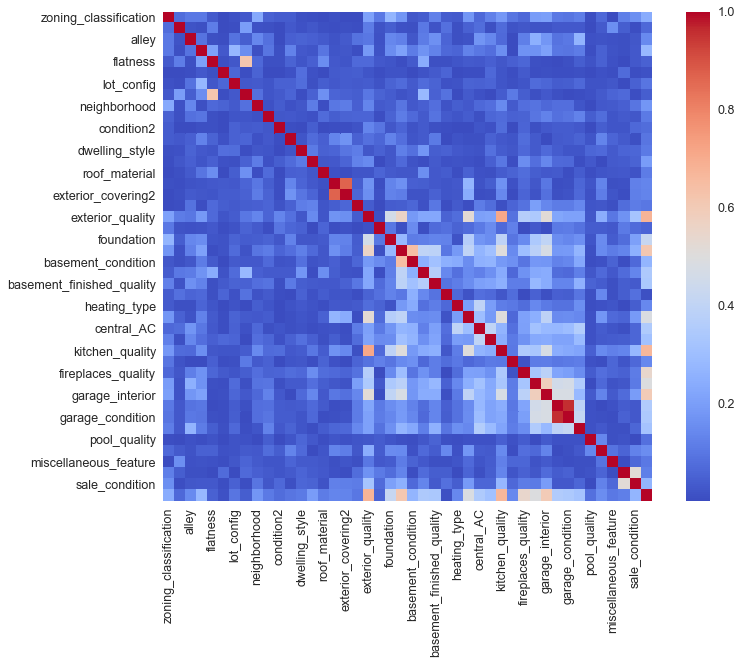

In [39]:
# get correlation matrix for categorical features only (that are now numerical)
names = list(dfcat) # takes the columns from categorical features only
names.append('log_sale_price')
corr_matrix = df_clean_unskewed[names].corr()
corr_abs = corr_matrix.abs()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_abs, cmap='coolwarm',vmax=1, square=True)

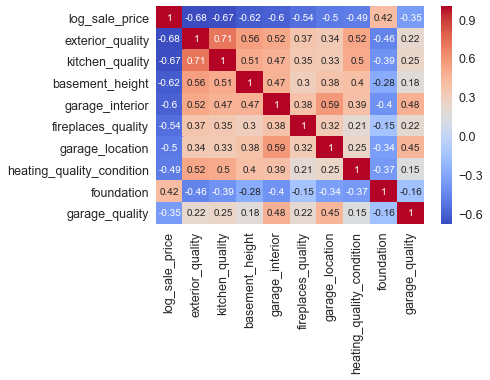

Best Features are :
 ['log_sale_price', 'exterior_quality', 'kitchen_quality', 'basement_height', 'garage_interior', 'fireplaces_quality', 'garage_location', 'heating_quality_condition', 'foundation', 'garage_quality'] 




In [40]:
# select the ones that correlates the best with the log sale price
df_select_cat = corr_matrix_best_features(df_clean_unskewed[names], corr_abs, criteria = 'log_sale_price', nb_features=10)

print("Best Features are :\n", list(df_select_cat), "\n\n")

### COMMENT 
Actually, none of the categorical features correlates well with the log_sale_price (no correlation is greater than 0.5)...

<a id='combine'></a>
## 2.4. Combining features

When looking for a house and buying it, people usually look at the **total area** in the house. 

Surprisingly, we noticed that such a feature did not appear among the existing features !

Therefore, we will introduce here a new feature `total_area` that combines the areas for each house:

In [41]:
df_clean_unskewed['total_area'] = df_clean_unskewed['total_basement_area'] + df_clean_unskewed['ground_living_area'] \
                                + df_clean_unskewed['first_floor_area'] + df_clean_unskewed['second_floor_area']

In [42]:
df_test_clean['total_area'] = df_test_clean['total_basement_area'] + df_test_clean['ground_living_area'] \
                                + df_test_clean['first_floor_area'] + df_test_clean['second_floor_area']

<a id='outlier'></a>
## 2.5. Removing outliers
Now that we have changed our categorical features into numerical features and analyse their correlation with the log sale price, we can remove the outliers that we have noticed in the paragraphs **1.3.** and **1.4.**.

In [43]:
# Removing numerical outliers
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['overall_quality']<=2)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['ground_living_area']>4000) & (df_clean_unskewed['log_sale_price']<13)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['garage_capacity']==4)].index, inplace=True)
df_clean_unskewed.reset_index(drop=True, inplace=True)

# Removing categorical outliers)

df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['utilities']==3)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['lot_config']==5)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['neighborhood']==2)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['condition1']==8)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['condition2']==6)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['condition2']==1)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['condition2']==4)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['condition2']==7)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['condition2']==5)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['roof_material']==4)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['roof_material']==3)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['exterior_covering1']==13)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['exterior_covering1']==3)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['exterior_covering1']==8)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['exterior_covering1']==2)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['exterior_covering2']==10)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['exterior_condition']==5)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['foundation']==6)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['basement_condition']==5)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['heating_quality_condition']==5)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['electrical_system']==5)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['home_functionality']==7)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['garage_condition']==1)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['miscellaneous_feature']==3)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['miscellaneous_feature']==2)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['sale_type']==6)].index, inplace=True)
df_clean_unskewed.drop(df_clean_unskewed[(df_clean_unskewed['sale_type']==10)].index, inplace=True)

df_clean_unskewed.reset_index(drop=True, inplace=True)

In [44]:
# as the row changed, we need to update the target : y_train_unskewed
y_train_unskewed = df_clean_unskewed.log_sale_price.values
len_train = len(df_clean_unskewed)
print(len_train, len(y_train_unskewed))

1153 1153


Therefore, 47 outliers have been removed from the train dataset.

<a id='bestcor'></a>
## 2.6. Best correlated features among all
This is the **full correlation matrix**, with both numerical and categorical features (which is huge because there are 80 features !) :

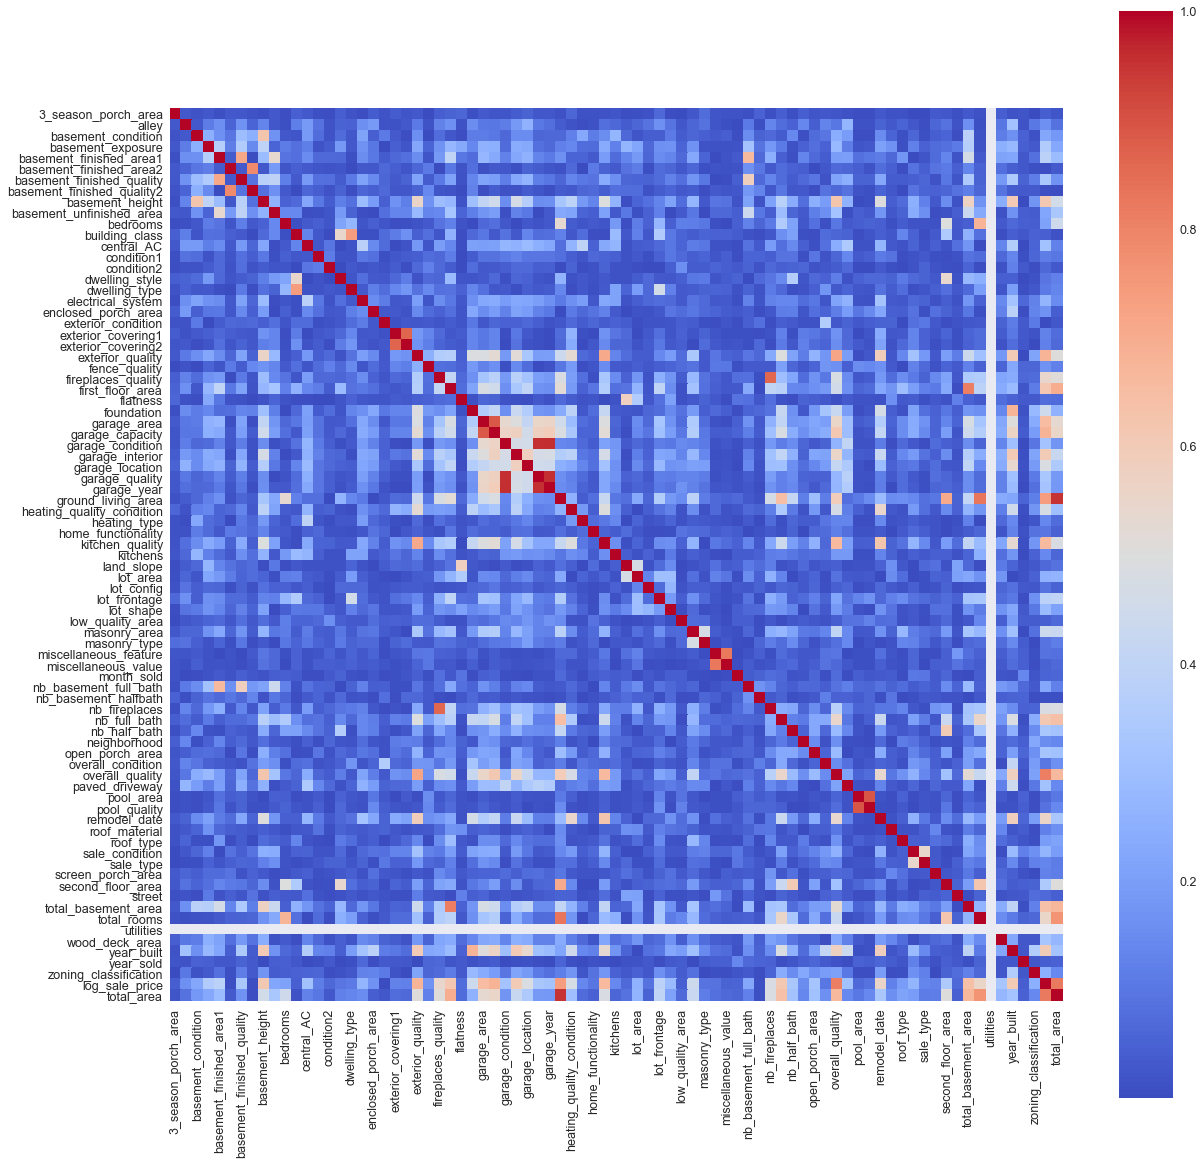

In [45]:
corr_matrix = df_clean_unskewed.corr()
corr_abs = corr_matrix.abs()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_abs, cmap='coolwarm',vmax=1, square=True)

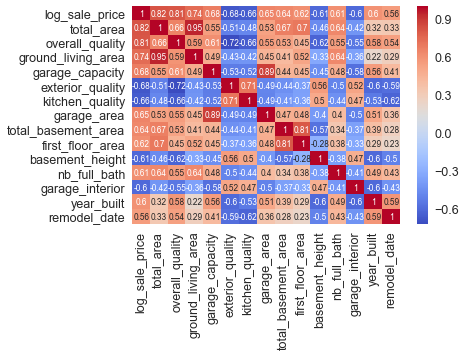

Best Features are :
 ['log_sale_price', 'total_area', 'overall_quality', 'ground_living_area', 'garage_capacity', 'exterior_quality', 'kitchen_quality', 'garage_area', 'total_basement_area', 'first_floor_area', 'basement_height', 'nb_full_bath', 'garage_interior', 'year_built', 'remodel_date'] 




In [46]:
# make a selection on top 15 features
df_select_total = corr_matrix_best_features(df_clean_unskewed, corr_abs, criteria = 'log_sale_price', nb_features=15, size = 8.3)
print("Best Features are :\n", list(df_select_total), "\n\n")

### COMMENTS 
We can notice that there are some strongly highly correlated features : for example, the `ground_living_area` is almost totally correlated with the `total_area`, so we will drop `ground_living area` as its correlation with the `log_sale_price` is lower.

<a id='drop'></a>
## 2.7. Dropping irrelevant columns


As we have seen, some features like `overall_quality` have a strong linear correlation (0.82) to the target.
For other features like `zoning_classification`, the correlation is very weak.
So for this challenge, we decided to select only the features that have a correlation larger than a certain threshold value.
We chose tp set this threshold value to a default value of `min_val_corr = 0.4`.



Moreover, as we have noticed in the paragraph **1.3** and **2.6**, some features are also strongly correlated to each other but not to the target.
So, **to avoid failures of the machine learning regression models due to multicollinearity**, these are dropped in the following defined `analysis_threshold` function.

We choose to drop :
* the columns noticed in the **OUTLIERS** paragraph of **1.3.** : `garage_area`, `total_rooms` and `first_floor_area`
* the columns that are now strongly correlated to the `total_area`: `ground_living_area` and `total_basement_area`




The following function `analysis_threshold` seperates the features in 2 groups : 
* irrelevant features: columns that have low correlation to the target AND columns that are redundant due to multicollinearity
* relevant features: columns that have high correlation to the target and are not redundant

In [47]:
min_val_corr = 0.4

def analysis_threshold (df, threshold = min_val_corr, criteria = 'log_sale_price', corrabs=True):
    # Take the best Correlation values
    # nb_features = number of the best features, the ones that correlates the best with the price of sale
    df_copy = df.copy()
    corr_matrix = df_copy.corr()
    corr_abs = corr_matrix.abs()
    if corrabs == True:
        ser_corr = corr_abs.nlargest(df_copy.shape[1], criteria)[criteria]
    else:
        ser_corr = corr_matrix.nlargest(df_copy.shape[1], criteria)[criteria]
    
    # Select columns with strong correlation to SalePrice,
    # drop columns with weak correlation
    # threshold value is chosen in global settings
    
    cols_abv_corr_limit = list(ser_corr[ser_corr.values > threshold].index)
    cols_bel_corr_limit = list(ser_corr[ser_corr.values <= threshold].index)
    
    cols_bel_corr_limit.append('log_sale_price') # drop the target
    # drop columns with high multicollinearity
    cols_bel_corr_limit.append('garage_area')
    cols_bel_corr_limit.append('total_rooms')
    cols_bel_corr_limit.append('first_floor_area')
    cols_bel_corr_limit.append('ground_living_area')
    cols_bel_corr_limit.append('total_basement_area')
    
    df_copy.drop(cols_bel_corr_limit, inplace= True, axis = 1)
    cols_abv_corr_limit.remove('log_sale_price')

    return(list(df_copy), df_copy)

In [48]:
selection, final_all_data = analysis_threshold (df_clean_unskewed, threshold = min_val_corr, criteria = 'log_sale_price')
print('Best selected features are : ', selection)

Best selected features are :  ['basement_height', 'exterior_quality', 'fireplaces_quality', 'foundation', 'garage_capacity', 'garage_interior', 'garage_location', 'heating_quality_condition', 'kitchen_quality', 'masonry_area', 'nb_fireplaces', 'nb_full_bath', 'overall_quality', 'remodel_date', 'utilities', 'year_built', 'total_area']


---

<a id=predictive></a>
# 3. Predictive models

Many regression models exist. It is difficult for us to know what to choose rightaway for our predictions. 

Therefore, we are going to present several models, with their advantages and disadvantages regarding predictions. Then, we will perform optimization techniques to choose the most appropriate one.

<a id=presentation></a>
## 3.1. Presentation of models & their pros and cons

### <u>Linear regression</u>
##### Pros
   * Basic yet super powerful machine learning algorithm.
   * Great when the relationship between covariates and response variable is known to be linear.

##### Cons
   * Linear Regression over simplifies many real world problems.
   * More often than not, covariates and response variables don’t exhibit a linear relationship.
    
<br><br>

### Ridge and Lasso : enhanced versions of linear regressions

### <u>Ridge</u>
A regularized linear regression model.

In order to give preference to a particular solution with desirable properties, a regularization term is included in the minimization of the loss (ordinary least squares). It leads to multiple possible estimates and helps reducing overfitting.
    
    
### <u>Lasso</u>
Only difference from Ridge regression: the regularization term is in absolute value.

But this difference has a huge impact: it enables to end up with fewer features included in the model than you started with, which is a huge advantage.

##### Pros
   * The biggest pro of Lasso is that it is better than the usual methods of automatic variable selection.  

##### Cons
   * Automatic... avoid thinking. Can produce senseless models, or ignore interesting variables.


##### References
https://www.quora.com/What-are-the-pros-and-cons-of-lasso-regression
https://codingstartups.com/practical-machine-learning-ridge-regression-vs-lasso/

### <u>Decision Trees</u>
##### Pros
   * Easy to interpret visually.
   * Can easily handle qualitative (categorical) features.

##### Cons
   * Prone to overfittings.


### <u>Random Forest</u>
Random Forest uses bootstrapping method for training/testing, and decision trees for prediction. Bootstrapping simply means generating random samples from the dataset with replacement. The final prediction is an average on all predictions.
##### Pros
   * Mainly avoids overfitting.
            
### <u>Extra Trees = Extremely Randomized Trees</u>
Random Forest and Extremely Randomized Trees differ in the sense that the splits of the trees in the Random Forest are deterministic whereas they are random in the case of an Extremely Randomized Trees.
##### Pros
   * Overcomes some issues of the deterministic method.
   * Computational advantage in comparison with Random Forest.


##### References
https://stats.stackexchange.com/questions/175523/difference-between-random-forest-and-extremely-randomized-trees
https://quantessentials.com/extra-trees/
https://www.quora.com/What-are-the-advantages-disadvantages-of-using-Gradient-Boosting-over-Random-Forests

### <u>Gradient boosting</u>

##### Quick presentation
Gradient Boosting = Gradient Descent + Boosting.

Boosting is a machine learning ensemble meta-algorithm for primarily reducing bias, and also variance in supervised learning. 
Boosting means that a weak learner is introduced to compensate the shortcomings of existing weak learners. ("Can a set of weak learners create a single strong learner?").

The main idea is again to aggregate several classifiers together, but also creating them iteratively. These "mini-classifiers" (weak learners) are generally simple and parameterized functions, usually decision trees where each parameter is the split criterion of the branches.

##### Pros
   * A lot of flexibility with the choice of loss functions, adaptable to the characteristics of the studied problems. Used for regression, classification, ranking.
   * Gradient Boosting has shown its effectiveness in several challenges! Ex: it has won Track 1 of the Yahoo Learning to Rank Challenge.
    
##### Cons
   * Computationally intensive (especially when number of trees is high) + memory occupation of the trees.
   * Many parameters which can interact and influence heavily the behavior of the approach (number of iterations, regularization, parameters, etc.)
   

##### References
http://eric.univ-lyon2.fr/~ricco/cours/slides/en/gradient_boosting.pdf
http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf
https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/

## K-Fold cross-validations

Now, we want to discover simple implementations of the different models that have been presented.

To do so, we simply perform k-fold cross-validations on the train set and look at the mean of the different MSE (Mean Square Error) obtained, so that we have a first overview of performances.

For the evaluation of the predictions in this challenge, the metric used is the RMSE (Root Mean Square Error) on the logarithms of the predicted prices. As we already work on logarithms, we can simply use the `mean_squared_error` from the `sklearn` library aand take the square root. We will also use `sklearn` to work on our models, as it conveniently has all the models we want.

#### How to choose k ? 
The bigger `k` is, the better the cross-validation will be, but it will also be slower.

The best one would be the Leave-One-Out cross validation. But it would mean that `k = 1153` in the case of our train set, which take too much time.

We choose `k=6` for k-fold cross-validation because it is a reasonable trade-off, after we tested different k and looked at run times.


Let's perform 6-fold cross-validations :

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import mean_squared_error

In [50]:
# separate train and test sets
X_train, X_test = final_all_data.iloc[:len_train, :], final_all_data.iloc[len_train:,:]

In [51]:
# function that does K-fold cross validation for a given model and returns the RMSE

def RMSE_crossvalidation(estimator, # chosen model
                         X_train, #train set
                         y_train_unskewed, # the target for prediction
                         scoring = "neg_mean_squared_error", #MSE 
                         cv = 6 #number of folds in k-fold cross validation
                        ) :
    scores = cross_val_score(estimator=estimator, X=X_train, y=y_train_unskewed, scoring=scoring, cv=cv)
    mse = abs(np.mean(scores))
    rmse = np.sqrt(mse)
    print("RMSE : ")
    return(np.sqrt(abs(np.mean(scores))))

<a id=crosslin></a>
## 3.2. Linear Regression

In [76]:
RMSE_crossvalidation(LinearRegression() , X_train , y_train_unskewed)

RMSE : 


0.14237312914680686

<a id=crossridge></a>
## 3.3. Ridge Regression

In [78]:
RMSE_crossvalidation(Ridge(alpha=0.005, normalize=True, tol=1e-05) , X_train , y_train_unskewed)

RMSE : 


0.142358967580261

<a id=crosslasso></a>
## 3.4. Lasso Regression

In [80]:
RMSE_crossvalidation(Lasso(alpha=0.0005) , X_train , y_train_unskewed)

RMSE : 


0.14236300796093873

<a id=crosstree></a>
## 3.5. Decision Tree Regressor

In [81]:
RMSE_crossvalidation(DecisionTreeRegressor() , X_train , y_train_unskewed)

RMSE : 


0.2161808860036405

<a id=crossxtree></a>
## 3.6. Extra-tree Regressor (randomized decision trees)

In [82]:
RMSE_crossvalidation(ExtraTreesRegressor() , X_train , y_train_unskewed)

RMSE : 


0.1547321857018555

<a id=crossboost></a>
## 3.7. Gradient Boosting Regressor

In [83]:
RMSE_crossvalidation(GradientBoostingRegressor() , X_train , y_train_unskewed)

RMSE : 


0.13980663545448838

### Summary 

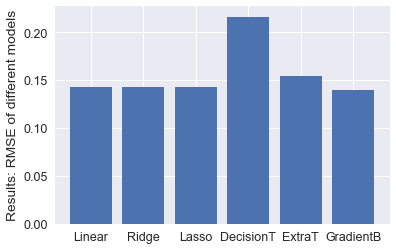

In [53]:
x_names = ["Linear", "Ridge", "Lasso", "DecisionT", "ExtraT", "GradientB"]
index = [i for i in range(len(x_names))]
results= [0.14237312914680686, 0.142358967580261, 0.14236300796093873, 0.2161808860036405, 0.1547321857018555, 0.13980663545448838]
plt.bar( index, results, align='center')
plt.xticks(index, x_names)
plt.ylabel("Results: RMSE of different models")
plt.show()


* We saw in this part an overview of all the models that we thought of possibly using for our prediction.
Because of the linear relationship between most features and the `log_sale_price` (see part **1.3**), we choose regression models.
* But the panel of regression models is quite large, thus we began with the simplest one: the linear regression model.
Of course, due to its simpleness, the results of this model aren't that good: RMSE = 0.14237312914680686.
* We then improved a little this model with Ridge (RMSE = 0.142358967580261) and Lasso (RMSE = 0.14236300796093873) techniques.
* Afterwards, we tried to explore more complex models: trees.
The first result, with a simple decision trees regressor, was quite disappointing: RMSE = 0.2161808860036405 !
And 0.1547321857018555 with Extra-trees.
* But the last model we tested, **Gradient Boosting Regressor**, cheered by many studies, finally gives us a really improved RMSE of 0.13980663545448838.

* It's worth noting that we here used the default values for all parameters.
Which means that the previous results can be enhanced by an appropriate tuning of parameters.


<a id=optim></a>
# 4. Optimization


<a id=why></a>

### Motivation
Before taking the different possible regression models into consideration, let's explain how we could optimally choose the best one.


A good way to compare models between each other is to find, for each model, parameters that are "good" enough, so that we can compare models between each other "at their best".
Indeed, for example, let's imagine that, for our data, model1 fits better than model2. To choose the best model, we compare the RMSE obtained from both models after doing a cross-validation on a certain set of parameters for both. But, if we arbitrarily choose a set of parameters for model1 and another arbitrarily chosen set of parameters for model2, there is a high risk that model1 gives worse results (RMSE) than model2 (if both models have some similarities), so that we make the wrong decision in choosing the best model.


Therefore, we should compare different models where parameters chosen for each model should be optimal or as close as optimal.

Two ways to choose the best parameters for one model are : **Grid Search** and **Bayesian optimization**

<a id=optimmethods></a>
## 4.1. Presentation of Grid Search and Bayesian Optimization

<a id=grid></a>
### 4.1.1. Grid Search

The traditional way of performing parameter optimization has been grid search, which is simply an exhaustive searching through a manually specified subset of the parameter space of a machine learning model. We feed the grid search algorithm with some performance metric, measured by cross-validation on the training set.

In Python the mostly used grid search algorithm is from `sklearn` : it is `GridSearchCV`.

`GridSearchCV` makes an exhaustive search over specified parameter values for an estimator.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

Let's show how `GridSearchCV` works on the example of a **Ridge Regression**

In [84]:
grid_model = GridSearchCV(estimator=Ridge(), 
                              param_grid={'alpha': np.linspace(0.1, 1, 1000, endpoint=True)}, 
                              scoring='neg_mean_squared_error', 
                              cv=6, 
                              verbose=0)
t0 = time()
grid_model.fit(X_train, y_train_unskewed)
print('Fitting and finding parameters in ', time()-t0 ,' seconds\n\n')

print("\n* The model's best parameters : \n", grid_model.best_estimator_)
print("\n* The MSE for the best parameters is: ", np.abs(grid_model.best_score_))
print("\n*The RMSE is: ", np.sqrt(np.abs(grid_model.best_score_)))

Fitting and finding parameters in  44.791863203048706  seconds



* The model's best parameters : 
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

* The MSE for the best parameters is:  0.02026913059286073

*The RMSE is:  0.1423696968910896


#### CONCLUSION:
The best value for the `alpha` parameter of Ridge Regression in the case of our dataset is: `alpha = 1.0`

<a id=bayes></a>
### 4.1.2. Bayesian Optimization

Bayesian optimization builds a probabilistic model of the function mapping from parameter values to the objective evaluated on a validation set. By iteratively evaluating a promising parameter configuration based on the current model, and then updating it, Bayesian optimization, aims to gather observations revealing as much information as possible about this function and, in particular, the location of the optimum. It tries to balance exploration (parameters for which the outcome is most uncertain) and exploitation (parameters expected close to the optimum). 

In practice, Bayesian optimization gives **better results in fewer evaluations compared to grid search**, due to the ability to reason about the quality of experiments before they are run.

In Python, one package that does Bayesian Optimization is `Bayesian-Optimization` : 
https://github.com/fmfn/BayesianOptimization

When optimizing the target function (in our case, we want to minimize the Root Mean Square Error (RMSE), we use the function `maximize` of the library. So, we want to maxime the opposite of the RMSE in order to minimize the RMSE.

The parameters in the `maximize` function are:
* `init_points`: Number of randomly chosen points to sample the target function before fitting the gaussian process.
* `n_iter`: Total number of times the process is to repeated. Note that currently this methods does not have stopping criteria (due to a number of reasons), therefore the total number of points to be sampled must be specified.
* `acq`: Acquisition function to be used, defaults to Upper Confidence Bound.
* `kappa`: A tunable parameter control the balance between exploration and exploitation. Increasing `kappa` will make the optimized hyperparameters pursuing exploration.
* `xi`: A tunable  parameter   of  Expected  Improvement  and  Probability  of  Improvement, to balance exploitation against exploration, increasing epsilon will make the optimized hyperparameters are more spread out across the whole range.
* `gp_params` : Parameters to be passed to the Scikit-learn Gaussian Process object

For choosing these parameters, this notebook is helpful : https://github.com/fmfn/BayesianOptimization/blob/master/examples/exploitation%20vs%20exploration.ipynb

Indeed, it tells us the influence of parameters' choices on the points found for the maximization, depending on our goal: **exploration or exploitation**.
* **Exploitation** : it means that we concentrate more around the peaks of the target function. We want to find the peaks as quickly as possible. For this, according to the results found in the notebook mentionned, good parameters for exploitation are : 
`kappa = 1.0` and `xi = 0.0`.
* **Exploration** :  it means that we want to explore all the possible points before finding the right peak for maximization. For this, according to the results found in the notebook mentionned, good parameters for exploitation are : 
`kappa = 10.0` and `xi = 0.1`.

We choose to use `kappa = 10.0` (and let the default value of `xi = 0`) to explore more on the possible values.

In [85]:
# import the Bayesian Optimisation library
from bayes_opt import BayesianOptimization
import warnings
warnings.filterwarnings('ignore')

# we define the function that we want to maximize

def f(alpha): 
    k=6
    
    estimator = Ridge(alpha = alpha)
    scores=cross_val_score(estimator=estimator, X=X_train, y=y_train_unskewed, scoring="neg_mean_squared_error", cv=k)
    mse=(abs(np.mean(scores)))
    
    return (-np.sqrt(mse)*1000) # we multiply by 1,000 to have more accuracy for the maximization

We are going to perform Bayesian optimisation on the Ridge model for different number of iterations, to see how it affects the optimization.

In [86]:
print('\nMaximization with n_iter = 2')
bo = BayesianOptimization(f, {'alpha': (0.0, 1)})
t0 = time()
bo.maximize(n_iter=2, kappa = 10.0)
print("Run time : ", time()-t0, ' seconds')


Maximization with n_iter = 2
Initialization
-----------------------------------------
 Step |   Time |      Value |     alpha | 
    1 | 00m00s | -142.37051 |    0.3132 | 
    2 | 00m00s | -142.36822 |    0.5918 | 
    3 | 00m00s | -142.36739 |    0.6943 | 
    4 | 00m00s | -142.36926 |    0.4654 | 
    5 | 00m00s | -142.36540 |    0.9437 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |     alpha | 
    6 | 00m13s | -142.36495 |    1.0000 | 
    7 | 00m14s | -142.36518 |    0.9710 | 
Run time :  41.14721369743347  seconds


In [87]:
print('\nMaximization with n_iter = 5')
bo = BayesianOptimization(f, {'alpha': (0.0, 1)})
t0 = time()
bo.maximize(n_iter=5, kappa = 10.0)
print("Run time : ", time()-t0, ' seconds')


Maximization with n_iter = 5
Initialization
-----------------------------------------
 Step |   Time |      Value |     alpha | 
    1 | 00m00s | -142.37256 |    0.0680 | 
    2 | 00m00s | -142.37161 |    0.1802 | 
    3 | 00m00s | -142.36890 |    0.5089 | 
    4 | 00m00s | -142.37312 |    0.0014 | 
    5 | 00m00s | -142.37041 |    0.3257 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |     alpha | 
    6 | 00m14s | -142.36502 |    0.9911 | 
    7 | 00m17s | -142.36520 |    0.9690 | 
    8 | 00m16s | -142.36535 |    0.9502 | 
    9 | 00m16s | -142.36531 |    0.9550 | 
   10 | 00m15s | -142.36515 |    0.9756 | 
Run time :  88.73266386985779  seconds


In [88]:
print('\nMaximization with n_iter = 25')
bo = BayesianOptimization(f, {'alpha': (0.0, 1)})
t0 = time()
bo.maximize(n_iter=25, kappa = 10.0)
print("Run time : ", time()-t0, ' seconds')


Maximization with n_iter = 25
Initialization
-----------------------------------------
 Step |   Time |      Value |     alpha | 
    1 | 00m00s | -142.36880 |    0.5209 | 
    2 | 00m00s | -142.36584 |    0.8887 | 
    3 | 00m00s | -142.36827 |    0.5861 | 
    4 | 00m00s | -142.37237 |    0.0900 | 
    5 | 00m00s | -142.36909 |    0.4859 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |     alpha | 
    6 | 00m13s | -142.36525 |    0.9628 | 
    7 | 00m13s | -142.36508 |    0.9844 | 
    8 | 00m11s | -142.36501 |    0.9927 | 
    9 | 00m12s | -142.36500 |    0.9942 | 
   10 | 00m11s | -142.36524 |    0.9634 | 
   11 | 00m11s | -142.36548 |    0.9336 | 
   12 | 00m13s | -142.36537 |    0.9467 | 
   13 | 00m12s | -142.36533 |    0.9521 | 
   14 | 00m13s | -142.36613 |    0.8523 | 
   15 | 00m05s | -142.36571 |    0.9041 | 
   16 | 00m08s | -142.36512 |    0.9789 | 
   17 | 00m05s | -142.36554 |    0.9259 | 
   18 | 00m14s | -142.36598 |  

In [89]:
print('\nMaximization with n_iter = 50')
bo = BayesianOptimization(f, {'alpha': (0.0, 1)})
t0 = time()
bo.maximize(n_iter=50, kappa = 10.0)
print("Run time : ", time()-t0, ' seconds')


Maximization with n_iter = 50
Initialization
-----------------------------------------
 Step |   Time |      Value |     alpha | 
    1 | 00m00s | -142.37136 |    0.2110 | 
    2 | 00m00s | -142.37174 |    0.1649 | 
    3 | 00m00s | -142.36605 |    0.8618 | 
    4 | 00m00s | -142.37019 |    0.3517 | 
    5 | 00m00s | -142.37142 |    0.2035 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |     alpha | 
    6 | 00m15s | -142.36503 |    0.9899 | 
    7 | 00m12s | -142.36496 |    0.9996 | 
    8 | 00m06s | -142.36513 |    0.9774 | 
    9 | 00m13s | -142.36495 |    1.0000 | 
   10 | 00m17s | -142.36502 |    0.9910 | 
   11 | 00m15s | -142.36506 |    0.9867 | 
   12 | 00m13s | -142.36504 |    0.9895 | 
   13 | 00m19s | -142.36565 |    0.9125 | 
   14 | 00m23s | -142.36537 |    0.9469 | 
   15 | 00m19s | -142.36518 |    0.9714 | 
   16 | 00m16s | -142.36524 |    0.9631 | 
   17 | 00m12s | -142.36521 |    0.9674 | 
   18 | 00m19s | -142.36538 |  

<div class="alert alert-info"><b>RESULTS AND COMMENTS</b>
<br>
<!-- -->
<table style="border-collapse: collapse;border: 1px solid black;" border="1">
  <tr>
    <th>Number of iterations</th>
    <th align="center">2</th>
    <th align="center">5</th>
    <th align="center">20</th>
    <th align="center">50</th>
    <th align="center">Results obtained with GridSearch</th>
  </tr>
  <tr>
    <th>alpha</th>
    <td align="center">1.0000</td>
    <td align="center">0.9911</td>
    <td align="center">0.9988</td>
    <td align="center">1.0000</td>
    <td align="center">1.0</td>
  </tr>
  <tr>
    <th>Best RMSE</th>
    <td align="center">0.14236495</td>
    <td align="center">0.14236502</td>
    <td align="center">0.14236496</td>
    <td align="center">0.14236495</td>
    <td align="center">0.1423696968910896</td>
  </tr>
 
 
</table>
<br>
So, it seems that increasing the number of iterations gives more accurate results (the results for n_iter = 2 was better than for n_iter = 5 because of randomness and because the difference in the number of iterations is too little). It is a tradeoff between accuracy and computational time. Indeed, a number of 50 iterations takes a lot more time to run than for 2 iterations.
</div>


<a id=bestm></a>
## 4.2. Grid Search to find the best model

We have presented 2 ways of finding the best parameters for one learning model. But in order to use it, we must obviously find the most suited model for our data.


* Let's implement **GridSearch** to find the <u>best model first.</u>
* Then, as Bayesian Optimization is more neat than GridSearch, we will implement **Bayesian Optimization** on our best model to <u>find the best parameters</u>.


Then, once the model and the parameters are found, we will **optimize the threshold** in the function `analysis_threshold` to select only the most relevant features.

In [55]:
# function to show the results of GridSearch on one chosen model
def find_best_model(estimator, param_grid, cv = 6, X =X_train, y=y_train_unskewed ):
    grid_model = GridSearchCV(estimator=estimator, 
                              param_grid=param_grid, 
                              scoring='neg_mean_squared_error', 
                              cv=cv, 
                              verbose=0)
    
    t0 = time()
    grid_model.fit(X, y)
    RMSE = np.sqrt(np.abs(grid_model.best_score_))
    print('Fitting and finding parameters in ', time()-t0 ,' seconds\n\n')
    print("\n* The model's best parameters : \n", grid_model.best_estimator_)
    print("\n* The MSE for the best parameters is: ", np.abs(grid_model.best_score_))
    
    print("\n*The RMSE is: ", RMSE, '\n\n')

    return (grid_model, RMSE)


# function to show the features importances for one chosen model
def print_feature_ranking(grid_model, name, top_x = 10, with_std = 0 , coef = 0):
    # Print the feature ranking
    if coef == 1:
        importances = grid_model.best_estimator_.coef_
        

    else:    
        importances = grid_model.best_estimator_.feature_importances_
        
    indices = np.argsort(importances)[-top_x:]
    print("\nFeature ranking for", name)
    for f in np.arange(top_x-1,-1,-1):
        print("%d. %s (%f)" % (top_x-f, X_train.iloc[:,indices[f]].name, 
                               importances[indices[f]]))
    # Plot the feature importances of the model
    plt.figure()
    plt.title("Feature importances for " + name)
    if with_std == 1:
        std = np.std([tree.feature_importances_ for tree in 
              grid_model.best_estimator_.estimators_],
             axis = 0)
        plt.bar(range(top_x), 
                importances[indices], 
                color="b",
                yerr=std[indices],
                align="center")
    else:
        plt.bar(range(top_x), 
                importances[indices], 
                color="b",
                align="center")
    plt.xticks(range(top_x), 
               X_train.iloc[:,indices].columns.tolist(),
               rotation=75)
    plt.xlim([-1, top_x])
    plt.show()

<a id=lin></a>
### 4.2.1. Linear Regression

Fitting and finding parameters in  0.6821787357330322  seconds



* The model's best parameters : 
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

* The MSE for the best parameters is:  0.020271454045273397

*The RMSE is:  0.14237785658336552 



Feature ranking for Linear Regression
1. overall_quality (0.056161)
2. nb_fireplaces (0.050042)
3. garage_capacity (0.048653)
4. foundation (0.004288)
5. remodel_date (0.001704)
6. year_built (0.001529)
7. total_area (0.000147)
8. masonry_area (0.000038)
9. utilities (0.000000)
10. fireplaces_quality (-0.001602)


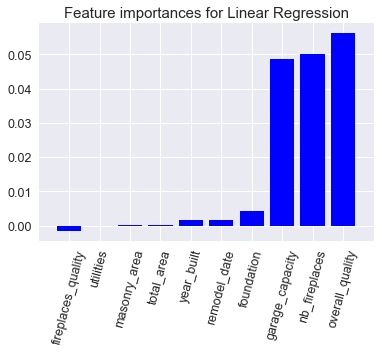

In [56]:
linReg_param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
linReg_model, RMSE = find_best_model( LinearRegression(), linReg_param_grid)

print_feature_ranking(linReg_model, "Linear Regression", coef = 1)

<a id=ridge></a>
### 4.2.2. Ridge Regression

Fitting and finding parameters in  2.423490285873413  seconds



* The model's best parameters : 
 Ridge(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

* The MSE for the best parameters is:  0.02026744168005512

*The RMSE is:  0.1423637653339329 



Feature ranking for Ridge Regression
1. overall_quality (0.055852)
2. nb_fireplaces (0.049939)
3. garage_capacity (0.049076)
4. foundation (0.004746)
5. remodel_date (0.001692)
6. year_built (0.001478)
7. total_area (0.000145)
8. masonry_area (0.000041)
9. utilities (0.000000)
10. fireplaces_quality (-0.001928)


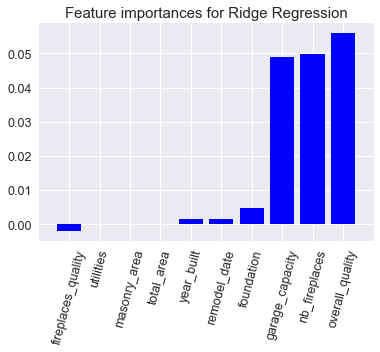

In [57]:
ridge_param_grid = {'alpha': [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
ridge_model, RMSE = find_best_model( Ridge(), ridge_param_grid)

print_feature_ranking(ridge_model, "Ridge Regression", coef = 1)

<a id=lasso></a>
### 4.2.3. Lasso Regression

Fitting and finding parameters in  8.259537935256958  seconds



* The model's best parameters : 
 Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=True, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

* The MSE for the best parameters is:  0.02027597532523985

*The RMSE is:  0.142393733447929 



Feature ranking for Lasso Regression
1. overall_quality (0.056730)
2. garage_capacity (0.045698)
3. nb_fireplaces (0.041669)
4. remodel_date (0.001782)
5. year_built (0.001658)
6. total_area (0.000148)
7. masonry_area (0.000040)
8. utilities (0.000000)
9. foundation (0.000000)
10. exterior_quality (-0.001448)


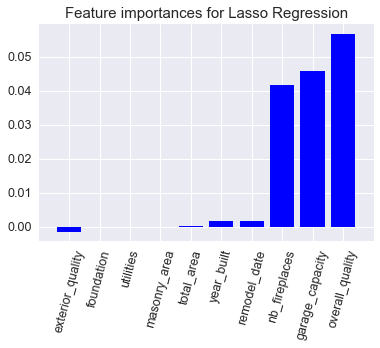

In [60]:
lasso_param_grid = {'alpha': [ 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
                    'fit_intercept':[True,False], 'normalize':[True,False], 
                    'precompute': [True, False],
                    'copy_X':[True, False]}
lasso_model, RMSE = find_best_model( Lasso(), lasso_param_grid)

print_feature_ranking(lasso_model, "Lasso Regression", coef = 1)

<a id=tree></a>
### 4.2.4. Decision Tree Regressor

Fitting and finding parameters in  1381.5360882282257  seconds



* The model's best parameters : 
 DecisionTreeRegressor(criterion='mse', max_depth=30, max_features=13,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.1,
           min_samples_split=0.1, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

* The MSE for the best parameters is:  0.04265309211958505

*The RMSE is:  0.20652625043704503 



Feature ranking for Decision Tree Regression
1. total_area (0.731511)
2. overall_quality (0.168368)
3. year_built (0.064321)
4. kitchen_quality (0.035800)
5. remodel_date (0.000000)
6. nb_full_bath (0.000000)
7. nb_fireplaces (0.000000)
8. masonry_area (0.000000)
9. utilities (0.000000)
10. heating_quality_condition (0.000000)


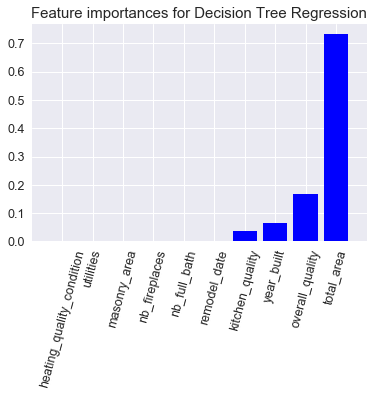

In [96]:
tree_param_grid = {'max_depth':[1, 2, 3, 4, 5, 10, 20, 30, 50, 100],
                    'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True), #as a percentage
                    'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True),
                    'max_features':list(range(1,len(selection))),
                  }
tree_model, RMSE = find_best_model( DecisionTreeRegressor(), tree_param_grid)

print_feature_ranking(tree_model, "Decision Tree Regression")

<a id=xtree></a>
### 4.2.5. Extra Trees Regressor

Fitting and finding parameters in  304.068243265152  seconds



* The model's best parameters : 
 ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=10,
          max_features=15, max_leaf_nodes=None, min_impurity_decrease=0.0,
          min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

* The MSE for the best parameters is:  0.021064052569981076

*The RMSE is:  0.14513460156000385 



Feature ranking for Extra Tree Regression
1. total_area (0.259589)
2. overall_quality (0.215620)
3. exterior_quality (0.098312)
4. garage_capacity (0.074543)
5. kitchen_quality (0.073906)
6. year_built (0.053463)
7. nb_full_bath (0.046094)
8. fireplaces_quality (0.035006)
9. garage_location (0.030570)
10. basement_height (0.030325)


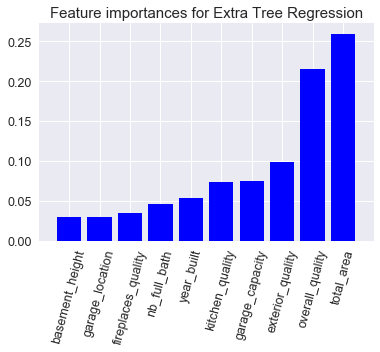

In [97]:
extratree_param_grid = { 'n_estimators': [10, 30, 100],
                         'max_features':list(range(1,len(selection))),
                    'max_depth':[1, 2, 3, 4, 5, 10, 20] #,
                    #'min_samples_split': np.linspace(0.1, 1.0, 5, endpoint=True), #as a percentage
                    #'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True)
                       }
extratree_model, RMSE = find_best_model( ExtraTreesRegressor(), extratree_param_grid)

print_feature_ranking(extratree_model, "Extra Tree Regression")

<a id=boost></a>
### 4.2.6. Gradient Boosting Regressor

Fitting and finding parameters in  11575.99012851715  seconds



* The model's best parameters : 
 GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=2, max_features=12,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

* The MSE for the best parameters is:  0.018973396146187326

*The RMSE is:  0.13774395139601348 



Feature ranking for Gradient Boosting Regression
1. total_area (0.232097)
2. year_built (0.183966)
3. remodel_date (0.089900)
4. overall_quality (0.077617)
5. masonry_area (0.066686)
6. basement_height (0.065372)
7. garage_location (0.046943)
8. heating_quality_condition (0.044850)
9. kitchen_quality (0.040625)
10. nb_full_bath (0.030128)


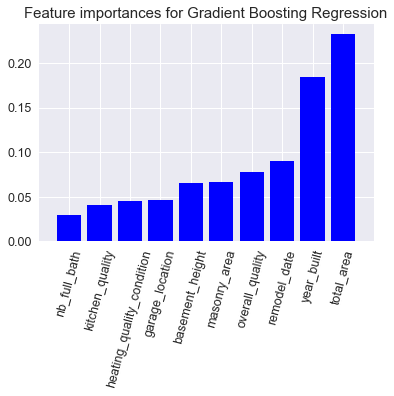

In [98]:
gradBoost_param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2 , 0.3, 0.5, 1],
                        'n_estimators':[100, 300, 500],
                        'max_depth': [1, 2, 3, 4, 5, 10, 20], 
                        #'min_samples_split': np.linspace(0.1, 1.0, 5, endpoint=True), #as a percentage
                        #'min_samples_leaf':np.linspace(0.1, 0.5, 5, endpoint=True),
                        'max_features':list(range(1,len(selection))),
                        'criterion':['mse']}
gradBoost_model, RMSE = find_best_model( GradientBoostingRegressor(), gradBoost_param_grid)

print_feature_ranking(gradBoost_model, "Gradient Boosting Regression")

### COMMENTS 
* We observe a surprising behavior regarding features' importance for certain models.
Indeed, for the linear regressors (Linear, Ridge, Lasso), the `nb_fireplaces` feature is in the top 3 whereas the `total_area` stands at the end of the top 10. On the contrary, for tree regressors and gradient boosting regressor, the `total_area` feature is by far the most important one (which seems more logical) !


* We observe that the RMSE values have been a bit improved, when comparing with the results of part **3.**.
This is logical since the parameters of each model have been tuned.
* Still, we have the same ranking of the models regarding performance.


* This study reinforces our idea of choosing the **Gradient Boosting Regressor** as our final model.
* Thus in the following we'll only focus on Gradient Boosting. Our next step will be to **optimize its parameters using this time the Bayesian Optimization**, to see if we can get a still improved result.

<a id=bayesoptim></a>
## 4.3. Bayesian Optimization to find the best parameters for the chosen model

So, the best model is Gradient Boosting Regressor. We will Bayesian Optimization on it to tune more precisely the parameters.

Previously, in **4.2.6.**, the following parameters have been roughly tuned thanks to GridSearch:
* `learning_rate=0.05`
* `max_depth=2`
* `n_estimators=500`

So, for Bayesian Optimization, we will make the parameters vary in intervalls centered around these found values.

In [164]:
def MSE_gradient_boosting(**parameters): 
    k=6
 
    gradient_boost = GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                                               learning_rate= parameters['learning_rate']/100,
                                               loss='ls', max_depth = int(parameters['max_depth']), max_features=None,max_leaf_nodes=None, 
                                               min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
                                               min_samples_split=2, min_weight_fraction_leaf=0.0,
                                               n_estimators = int(parameters['n_estimators']),
                                               presort='auto', random_state=None,
                                               subsample=1.0, verbose=0, warm_start=False
                                              )
    scores=cross_val_score(estimator=gradient_boost, X=X_train, y=y_train_unskewed, scoring="neg_mean_squared_error", cv=k)
    mse=(abs(np.mean(scores)))
    rmse = np.sqrt(mse)
    return (-rmse * 10000000000000) # we multiply for more accuracy on the maximization

In [117]:
# tuning the three parameters altogether, in intervals around the optimal values found by grid search in 4.2.6

parameters = {'learning_rate': [3,5],
                        'n_estimators':[500, 600],
                        'max_depth': [1, 3]}

bo = BayesianOptimization(MSE_gradient_boosting, parameters)
t0 = time()
bo.maximize(n_iter=100, kappa = 10.0)
print("Run time : ", time()-t0, ' seconds')

Initialization
------------------------------------------------------------------------------
 Step |   Time |      Value |   learning_rate |   max_depth |   n_estimators | 
    1 | 00m02s | -1434000413708.43970 |          4.3562 |      1.9570 |       505.9782 | 
    2 | 00m02s | -1439558386014.92163 |          3.5354 |      1.8926 |       542.2014 | 
    3 | 00m02s | -1431736647164.85913 |          3.9675 |      1.7200 |       594.8312 | 
    4 | 00m02s | -1427525470764.89917 |          4.5103 |      1.9111 |       593.2681 | 
    5 | 00m02s | -1429187147110.63379 |          4.5020 |      1.3823 |       551.0457 | 
Bayesian Optimization
------------------------------------------------------------------------------
 Step |   Time |      Value |   learning_rate |   max_depth |   n_estimators | 
    6 | 00m10s | -1440982084135.59424 |          5.0000 |      3.0000 |       573.7444 | 
    7 | 00m03s | -1428905043051.47192 |          5.0000 |      1.0000 |       500.0000 | 
    8 | 00m07s 

   83 | 00m09s | -1413529872031.78809 |          3.0000 |      3.0000 |       511.1075 | 
   84 | 00m06s | -1448322032801.64697 |          3.0000 |      1.0000 |       509.7375 | 
   85 | 00m11s | -1413299455673.93286 |          3.0000 |      3.0000 |       509.8780 | 
   86 | 00m11s | -1434504829282.75586 |          5.0000 |      3.0000 |       513.0264 | 
   87 | 00m06s | -1446049560764.42798 |          3.0000 |      1.0000 |       535.4244 | 
   88 | 00m09s | -1413579432095.60156 |          3.0000 |      3.0000 |       512.5388 | 
   89 | 00m07s | -1388120023737.53271 |          3.0000 |      2.7292 |       507.0969 | 
   90 | 00m09s | -1413182650926.89722 |          3.0000 |      3.0000 |       507.1582 | 
   91 | 00m09s | -1413665610801.44092 |          3.0000 |      3.0000 |       504.0264 | 
   92 | 00m08s | -1387794864189.42969 |          3.0000 |      2.2131 |       507.7242 | 
   93 | 00m07s | -1385187994961.97827 |          3.4388 |      2.5702 |       507.5135 | 
   94 | 00

### COMMENTS
Bayesian Optimization is efficient with one dimension parameter to tune, as seen in **4.1.2.**.

However, the results we have just obtained shows that it has some difficulty on multi-dimensional parameter to tune.

Therefore, we are going to tune the **3 parameters of gradient boosting**, one by one.

The best performance for now on k-fold cross-validation is found with : 
* `learning_rate = 3.0578`
* `max_depth = 3`
* `n_estimators = 571`
    
So, when tuning these 3 parameters one by one (we vary one and make the other 2 constant), we can explore values around the optimal values just found, to make them more accurate.

In [120]:
# tuning the learning_rate, while n_estimator and max_depth are kept constant

parameters = {'learning_rate': [3,5],
                        'n_estimators':[600, 600],
                        'max_depth': [2,2]}

bo = BayesianOptimization(MSE_gradient_boosting, parameters)
t0 = time()
bo.maximize(n_iter=100, kappa = 10.0)
print("Run time : ", time()-t0, ' seconds')

Initialization
------------------------------------------------------------------------------
 Step |   Time |      Value |   learning_rate |   max_depth |   n_estimators | 
    1 | 00m04s | -1384752410318.09302 |          3.6767 |      2.0000 |       600.0000 | 
    2 | 00m03s | -1389534298718.77271 |          4.5059 |      2.0000 |       600.0000 | 
    3 | 00m03s | -1386645907965.86157 |          4.2893 |      2.0000 |       600.0000 | 
    4 | 00m04s | -1387469987798.22437 |          3.7225 |      2.0000 |       600.0000 | 
    5 | 00m03s | -1385753387316.11060 |          3.9190 |      2.0000 |       600.0000 | 
Bayesian Optimization
------------------------------------------------------------------------------
 Step |   Time |      Value |   learning_rate |   max_depth |   n_estimators | 
    6 | 00m05s | -1383212256127.10132 |          3.0000 |      2.0000 |       600.0000 | 
    7 | 00m05s | -1390083588223.03857 |          5.0000 |      2.0000 |       600.0000 | 
    8 | 00m06s 

   83 | 00m11s | -1385951452050.32324 |          3.4117 |      2.0000 |       600.0000 | 
   84 | 00m11s | -1382664443387.19067 |          3.6088 |      2.0000 |       600.0000 | 
   85 | 00m11s | -1388070376430.35059 |          4.0091 |      2.0000 |       600.0000 | 
   86 | 00m11s | -1386121486155.88574 |          4.0428 |      2.0000 |       600.0000 | 
   87 | 00m12s | -1387671743183.63818 |          4.8664 |      2.0000 |       600.0000 | 
   88 | 00m11s | -1386387786966.82764 |          3.9742 |      2.0000 |       600.0000 | 
   89 | 00m12s | -1380621062413.61938 |          3.5095 |      2.0000 |       600.0000 | 
   90 | 00m23s | -1383557569345.35498 |          3.0274 |      2.0000 |       600.0000 | 
   91 | 00m23s | -1389997916258.66260 |          4.9731 |      2.0000 |       600.0000 | 
   92 | 00m22s | -1383098402436.15015 |          3.5467 |      2.0000 |       600.0000 | 
   93 | 00m21s | -1388323655312.41138 |          3.9362 |      2.0000 |       600.0000 | 
   94 | 00

So, the **best `learning_rate` found is `3.5095`**.

In [129]:
# tuning n_estimators, while learning_rate and max_depth are kept constant

parameters = {'learning_rate': [3.5095, 3.5095],
                        'n_estimators':[500, 600],
                        'max_depth':[2, 2]}

bo = BayesianOptimization(MSE_gradient_boosting, parameters)
t0 = time()
bo.maximize(n_iter=100, kappa = 10.0)
print("Run time : ", time()-t0, ' seconds')

Initialization
------------------------------------------------------------------------------
 Step |   Time |      Value |   learning_rate |   max_depth |   n_estimators | 
    1 | 00m03s | -1381839803114.56592 |          3.5095 |      2.0000 |       536.3189 | 
    2 | 00m04s | -1380710915702.27930 |          3.5095 |      2.0000 |       568.9731 | 
    3 | 00m04s | -1382805817033.61304 |          3.5095 |      2.0000 |       531.1416 | 
    4 | 00m04s | -1381060190857.68945 |          3.5095 |      2.0000 |       555.5136 | 
    5 | 00m04s | -1380083187890.89307 |          3.5095 |      2.0000 |       582.9645 | 
Bayesian Optimization
------------------------------------------------------------------------------
 Step |   Time |      Value |   learning_rate |   max_depth |   n_estimators | 
    6 | 00m08s | -1380733711025.79077 |          3.5095 |      2.0000 |       600.0000 | 
    7 | 00m07s | -1383872865336.19019 |          3.5095 |      2.0000 |       500.0000 | 
    8 | 00m10s 

   87 | 00m14s | -1383095129266.48584 |          3.5095 |      2.0000 |       516.1573 | 
   88 | 00m14s | -1380587379253.82446 |          3.5095 |      2.0000 |       596.7673 | 
   89 | 00m14s | -1384021525488.33203 |          3.5095 |      2.0000 |       503.1894 | 
   90 | 00m15s | -1383061696006.14648 |          3.5095 |      2.0000 |       523.9888 | 
   91 | 00m14s | -1383043014782.22681 |          3.5095 |      2.0000 |       528.0806 | 
   92 | 00m15s | -1382517899232.25269 |          3.5095 |      2.0000 |       530.1424 | 
   93 | 00m15s | -1381364938292.00854 |          3.5095 |      2.0000 |       547.9982 | 
   94 | 00m13s | -1380765850621.75049 |          3.5095 |      2.0000 |       598.7284 | 
   95 | 00m14s | -1380924662261.52881 |          3.5095 |      2.0000 |       560.5760 | 
   96 | 00m15s | -1380565463467.55273 |          3.5095 |      2.0000 |       579.4497 | 
   97 | 00m16s | -1383957550964.56250 |          3.5095 |      2.0000 |       501.2671 | 
   98 | 00

So, the **best `n_estimators` found is `567`** (round value).

In [165]:
# tuning max_depth, while learning_rate and n_estimators are kept constant

parameters = {'learning_rate': [3.5095,3.5095],
                        'n_estimators':[567, 567],
                        'max_depth': [1, 3]}

bo = BayesianOptimization(MSE_gradient_boosting, parameters)
t0 = time()
bo.maximize(n_iter=50, kappa = 10.0)
print("Run time : ", time()-t0, ' seconds')

Initialization
------------------------------------------------------------------------------
 Step |   Time |      Value |   learning_rate |   max_depth |   n_estimators | 
    1 | 00m04s | -1438038785247.87964 |          3.5095 |      1.0320 |       567.0000 | 
    2 | 00m08s | -1380349311610.94287 |          3.5095 |      2.8687 |       567.0000 | 
    3 | 00m06s | -1380045544108.43506 |          3.5095 |      2.4601 |       567.0000 | 
    4 | 00m08s | -1380243495512.82983 |          3.5095 |      2.0103 |       567.0000 | 
    5 | 00m04s | -1438038785247.87939 |          3.5095 |      1.5686 |       567.0000 | 
Bayesian Optimization
------------------------------------------------------------------------------
 Step |   Time |      Value |   learning_rate |   max_depth |   n_estimators | 
    6 | 00m14s | -1423346714358.88599 |          3.5095 |      3.0000 |       567.0000 | 
    7 | 00m15s | -1380672690228.48706 |          3.5095 |      2.7021 |       567.0000 | 
    8 | 00m15s 

So, the **best `max_depth` found is `2`** (round value).

<a id=thoptim></a>
## 4.4. Optimization of the threshold
Now, the best parameters have been found !

Let's improve the performance on the number of selected columns in the train set. To do so, we also perform **Bayesian Optimization on the threshold** above which the correlation to the target is sufficient.

In [166]:
def MSE_threshold(thresh): 
    k=6
    X_train = analysis_threshold(df = df_clean_unskewed, threshold = thresh)[1]
    
    gradient_boost = GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
                                               learning_rate= 0.035095,
                                               loss='ls', max_depth = 2, max_features=None,max_leaf_nodes=None, 
                                               min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
                                               min_samples_split=2, min_weight_fraction_leaf=0.0,
                                               n_estimators = 667,
                                               presort='auto', random_state=None,
                                               subsample=1.0, verbose=0, warm_start=False)
    
    scores=cross_val_score(estimator=gradient_boost, X=X_train, y=y_train_unskewed, scoring="neg_mean_squared_error", cv=k)
    
    mse=(abs(np.mean(scores)))
    rmse = np.sqrt(mse)
    return (-rmse * 10000000000000)


param = {'thresh': (0.05, 0.85) }

bo = BayesianOptimization(MSE_threshold, param)
t0 = time()
bo.maximize(n_iter=50, kappa = 10.0)
print("Run time : ", time()-t0, ' seconds')

Initialization
-----------------------------------------
 Step |   Time |      Value |    thresh | 
    1 | 00m08s | -1316304921333.93091 |    0.3495 | 
    2 | 00m11s | -1311976721101.44800 |    0.3060 | 
    3 | 00m10s | -1322911121177.24902 |    0.3317 | 
    4 | 00m04s | -1744055794986.19189 |    0.7031 | 
    5 | 00m04s | -1744134616125.49951 |    0.7209 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |    thresh | 
    6 | 00m23s | -1184008797051.43921 |    0.0500 | 
    7 | 00m07s | -1622990260357.23120 |    0.6712 | Warning: Test point chose at random due to repeated sample.

    8 | 00m04s | -3921075394698.93018 |    0.8500 | 
    9 | 00m10s | -1401047074279.00073 |    0.5136 | 
   10 | 00m18s | -1233817719915.75659 |    0.1751 | 
   11 | 00m09s | -1400823692279.80981 |    0.4986 | Warning: Test point chose at random due to repeated sample.

   12 | 00m16s | -1234083079343.21899 |    0.2222 | Warning: Test point chose at random du

### COMMENTS
* So, the optimal threshold is **very low** (0.0937), which means that we select **many features** to perform our predictions !
* For this threshold value, the **RMSE is the lowest** we've ever had : ~ 0.1173.

* Let's check that the RMSE is around this value by doing a k-fold cross-validation on this model :

In [62]:
X_train = analysis_threshold(df = df_clean_unskewed, threshold = 0.0937)[1]


final_model = GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate= 0.035095, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=667, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)


RMSE_crossvalidation(final_model , X_train , y_train_unskewed)

RMSE : 


0.11763055014095067

The result is similar. Therefore, the model is ready !

<a id=submit></a>
## 4.5. Creating the submission file

In [63]:
optimal_threshold = 0.0937
columns, all_final_data_submission = analysis_threshold(df = df_clean_unskewed, threshold = optimal_threshold)

df_final_test = df_test_clean[columns]

final_model.fit(all_final_data_submission, y_train_unskewed)

GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.035095, loss='ls', max_depth=2,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=667,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [64]:
predictions = final_model.predict(df_final_test)
final_predictions = np.expm1(predictions)

submission = pd.DataFrame()
submission['Id'] = test_id

submission['SalePrice'] = final_predictions
print(submission.head())
submission.to_csv('submission-aml11.csv', index=False)

     Id      SalePrice
0  1201  101020.814189
1  1202  195089.133635
2  1203  125392.971613
3  1204  219377.439180
4  1205  145958.646248
